<a href="https://colab.research.google.com/github/dj251/MSF/blob/main/Portfolio_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This code has shown my findings while building a code for analysis of various buckets of etfs used to build conservative, balanced, growth and an all weather portfolio. It include volitality, returns, sharpe ratio, efficient frontier, tangency point among the various calculations used.

In [ ]:
pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 8.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import cvxpy as cp
from itertools import product
from pypfopt import EfficientFrontier, plotting, risk_models, expected_returns

In [ ]:
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns')

In [ ]:
data = data.set_index("Date")

In [ ]:
#data


--- Conservative Portfolio ---


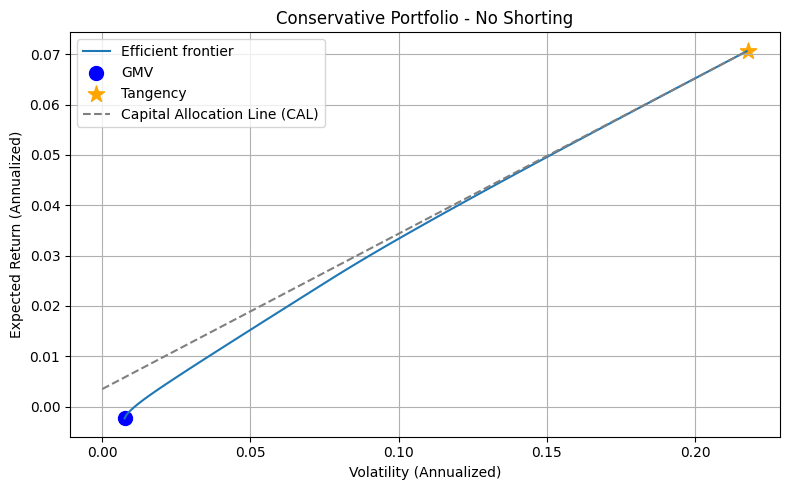

No Shorting
  GMV  -> Return: -0.23%, Volatility: 0.75%
  TANG -> Return: 7.07%, Volatility: 21.78%, Sharpe: 0.31

  GMV Portfolio Weights:
    IVV: 0.00%
    IXUS: 0.00%
    AGG: 0.00%
    VTIP: 68.31%
    VCSH: 31.69%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 0.00%
    IXUS: -0.00%
    AGG: -0.00%
    VTIP: -0.00%
    VCSH: -0.00%
    BITB: 100.00%


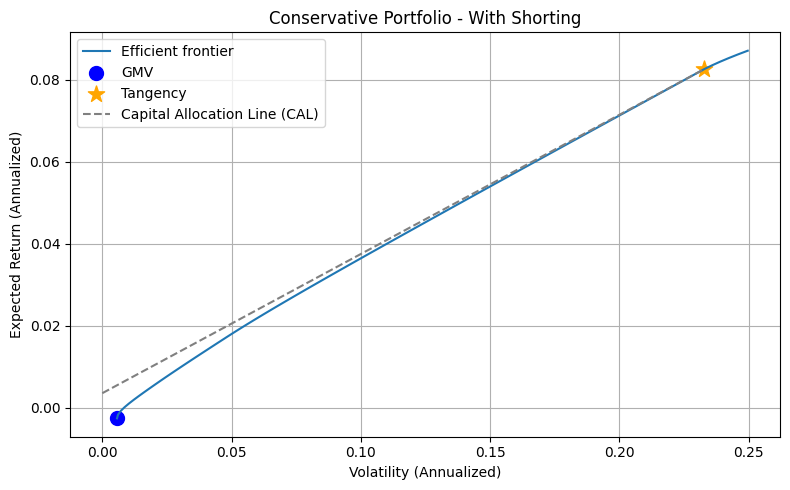

With Shorting
  GMV  -> Return: -0.26%, Volatility: 0.57%
  TANG -> Return: 8.26%, Volatility: 23.29%, Sharpe: 0.34

  GMV Portfolio Weights:
    IVV: 0.33%
    IXUS: -9.84%
    AGG: -35.56%
    VTIP: 46.13%
    VCSH: 99.17%
    BITB: -0.22%

  Tangency Portfolio Weights:
    IVV: 100.00%
    IXUS: 0.00%
    AGG: -100.00%
    VTIP: 100.00%
    VCSH: -100.00%
    BITB: 100.00%

--- Balanced Portfolio ---


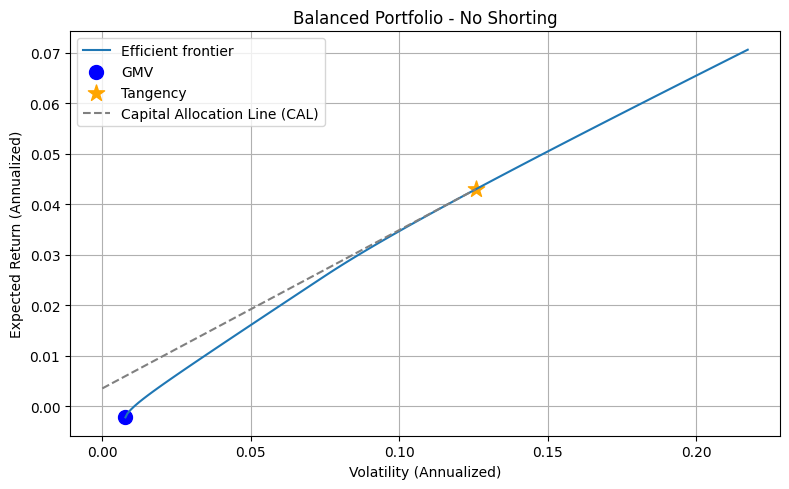

No Shorting
  GMV  -> Return: -0.22%, Volatility: 0.78%
  TANG -> Return: 4.30%, Volatility: 12.58%, Sharpe: 0.31

  GMV Portfolio Weights:
    IVV: 0.00%
    SPTM: 0.00%
    VONG: 0.00%
    IXUS: 0.00%
    VIGI: 0.00%
    VCLT: 0.00%
    VTEB: 0.00%
    VTIP: 100.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 0.00%
    SPTM: 0.00%
    VONG: 46.84%
    IXUS: 0.00%
    VIGI: 0.00%
    VCLT: 0.00%
    VTEB: 0.00%
    VTIP: 0.00%
    BITB: 53.16%


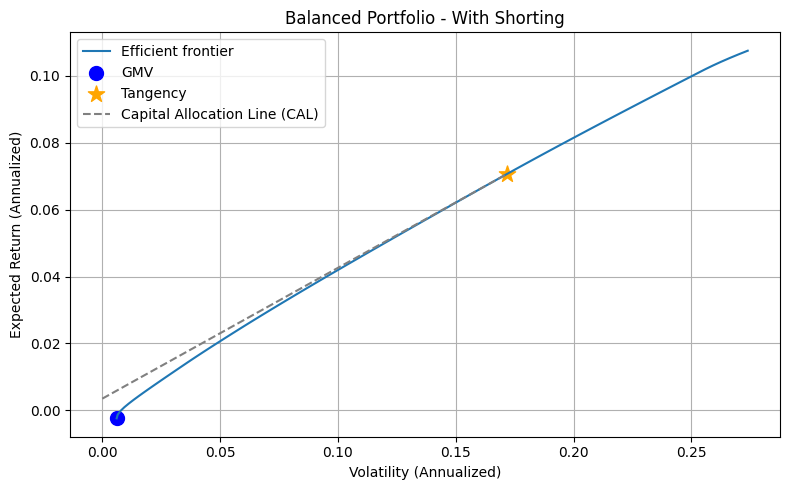

With Shorting
  GMV  -> Return: -0.24%, Volatility: 0.61%
  TANG -> Return: 7.06%, Volatility: 17.16%, Sharpe: 0.39

  GMV Portfolio Weights:
    IVV: 18.72%
    SPTM: -6.37%
    VONG: -7.66%
    IXUS: -2.09%
    VIGI: -5.02%
    VCLT: -18.38%
    VTEB: 37.82%
    VTIP: 83.14%
    BITB: -0.16%

  Tangency Portfolio Weights:
    IVV: 100.00%
    SPTM: 100.00%
    VONG: 100.00%
    IXUS: -100.00%
    VIGI: -53.36%
    VCLT: -100.00%
    VTEB: -100.00%
    VTIP: 93.31%
    BITB: 60.04%

--- Growth Portfolio ---


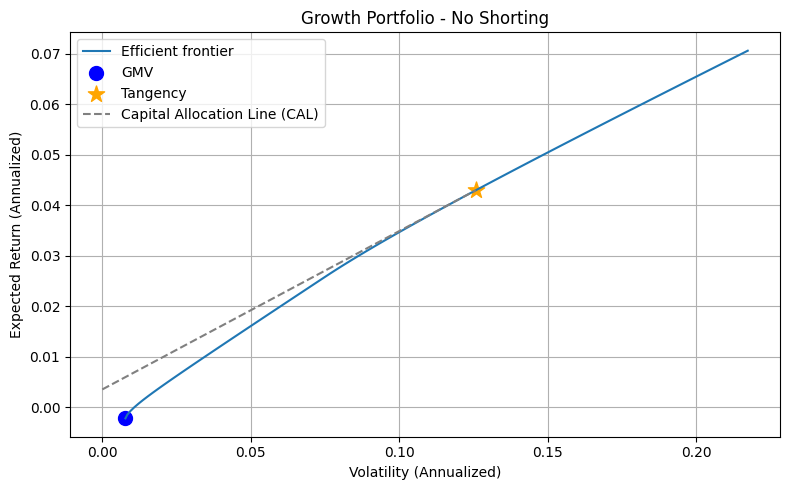

No Shorting
  GMV  -> Return: -0.22%, Volatility: 0.78%
  TANG -> Return: 4.30%, Volatility: 12.58%, Sharpe: 0.31

  GMV Portfolio Weights:
    VONG: 0.00%
    VBR: 0.00%
    IXUS: 0.00%
    CGW: 0.00%
    VOE: 0.00%
    AGG: 0.00%
    VTEB: 0.00%
    VTIP: 100.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    VONG: 46.84%
    VBR: 0.00%
    IXUS: 0.00%
    CGW: 0.00%
    VOE: 0.00%
    AGG: 0.00%
    VTEB: 0.00%
    VTIP: 0.00%
    BITB: 53.16%


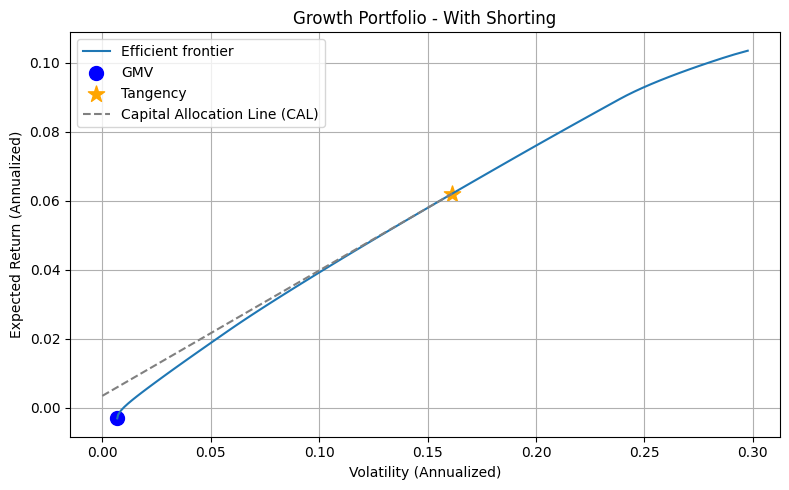

With Shorting
  GMV  -> Return: -0.30%, Volatility: 0.69%
  TANG -> Return: 6.21%, Volatility: 16.14%, Sharpe: 0.36

  GMV Portfolio Weights:
    VONG: -1.79%
    VBR: -0.63%
    IXUS: -7.12%
    CGW: -5.74%
    VOE: 6.78%
    AGG: -13.11%
    VTEB: 21.90%
    VTIP: 100.00%
    BITB: -0.29%

  Tangency Portfolio Weights:
    VONG: 100.00%
    VBR: -100.00%
    IXUS: -70.37%
    CGW: 100.00%
    VOE: 83.27%
    AGG: -100.00%
    VTEB: -75.64%
    VTIP: 100.00%
    BITB: 62.73%

--- All_Weather Portfolio ---


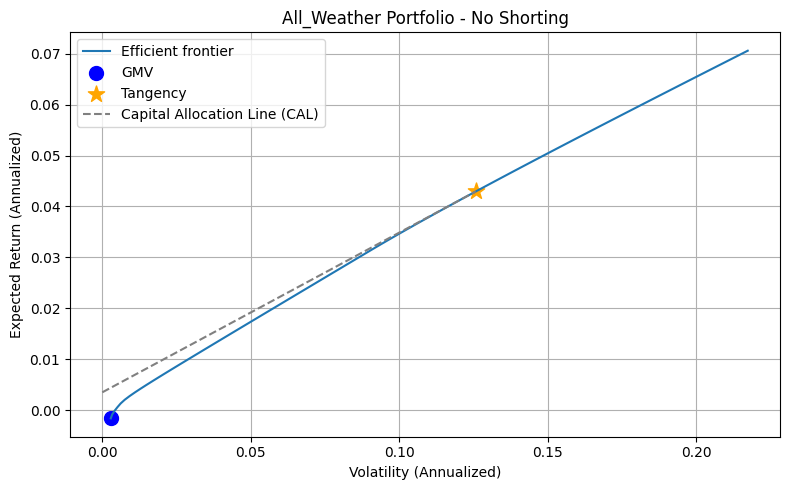

No Shorting
  GMV  -> Return: -0.16%, Volatility: 0.29%
  TANG -> Return: 4.30%, Volatility: 12.58%, Sharpe: 0.31

  GMV Portfolio Weights:
    IVV: -0.00%
    VONG: -0.00%
    VXUS: -0.00%
    VCLT: 0.00%
    AGG: 0.00%
    VTIP: 2.46%
    MINT: 60.48%
    JPLD: 37.07%
    BITB: -0.00%

  Tangency Portfolio Weights:
    IVV: 0.00%
    VONG: 46.84%
    VXUS: 0.00%
    VCLT: 0.00%
    AGG: 0.00%
    VTIP: 0.00%
    MINT: 0.00%
    JPLD: 0.00%
    BITB: 53.16%


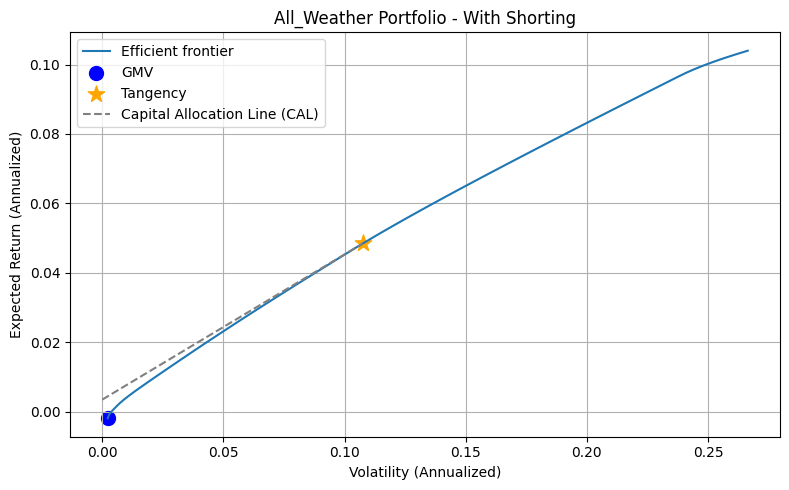

With Shorting
  GMV  -> Return: -0.19%, Volatility: 0.22%
  TANG -> Return: 4.85%, Volatility: 10.75%, Sharpe: 0.42

  GMV Portfolio Weights:
    IVV: 5.89%
    VONG: -3.20%
    VXUS: -2.41%
    VCLT: -11.98%
    AGG: 24.83%
    VTIP: -0.64%
    MINT: 61.96%
    JPLD: 25.55%
    BITB: 0.01%

  Tangency Portfolio Weights:
    IVV: 100.00%
    VONG: 100.00%
    VXUS: -92.79%
    VCLT: -100.00%
    AGG: -100.00%
    VTIP: 100.00%
    MINT: -42.63%
    JPLD: 100.00%
    BITB: 35.42%


In [ ]:
#PORTFOLIO WITH ALL STOCKS BONDS GOLD AND BITB
# Load your excess return data
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns', index_col=0)
data.dropna(inplace=True)  # Clean any missing values

# Set your risk-free rate (annualized)
rf = 0.0035  # 0.35% per month × 12 = 4.2% per year

# Define your ETF buckets
buckets = {
    "Conservative": ["IVV", "IXUS", "AGG", "VTIP", "VCSH", "BITB"],
    "Balanced": ["IVV", "SPTM", "VONG", "IXUS", "VIGI", "VCLT", "VTEB", "VTIP", "BITB"],
    "Growth": ["VONG", "VBR", "IXUS", "CGW", "VOE", "AGG", "VTEB", "VTIP", "BITB"],
    "All_Weather": ["IVV", "VONG", "VXUS", "VCLT", "AGG", "VTIP", "MINT", "JPLD", "BITB"]
}

# Iterate through each portfolio bucket
for name, tickers in buckets.items():
    print(f"\n--- {name} Portfolio ---")

    df = data[tickers].dropna()
    mu = df.mean()  # Annualized excess return
    S = df.cov()     # Annualized covariance

    for shorting in [False, True]:
        label = "With Shorting" if shorting else "No Shorting"
        bounds = (-1, 1) if shorting else (0, 1)

        # Initialize frontier for plotting
        ef_plot = EfficientFrontier(mu, S, weight_bounds=bounds)

        # GMV
        ef_gmv = EfficientFrontier(mu, S, weight_bounds=bounds)
        w_gmv = ef_gmv.min_volatility()
        ret_gmv, vol_gmv, _ = ef_gmv.portfolio_performance(risk_free_rate=rf)

        # Tangency (Max Sharpe)
        ef_tan = EfficientFrontier(mu, S, weight_bounds=bounds)
        w_tan = ef_tan.max_sharpe(risk_free_rate=rf)
        ret_tan, vol_tan, sharpe_tan = ef_tan.portfolio_performance(risk_free_rate=rf)

        # Plot Efficient Frontier
        fig, ax = plt.subplots(figsize=(8, 5))
        plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=False)

        # Plot GMV & Tangency points
        ax.scatter(vol_gmv, ret_gmv, marker="o", color='blue', s=100, label="GMV")
        ax.scatter(vol_tan, ret_tan, marker="*", color='orange', s=150, label="Tangency")

        # Plot CAL line
        x = np.linspace(0, vol_tan, 100)
        cal = rf + sharpe_tan * x
        ax.plot(x, cal, label='Capital Allocation Line (CAL)', color='gray', linestyle='--')

        # Labels
        ax.set_title(f"{name} Portfolio - {label}")
        ax.set_xlabel("Volatility (Annualized)")
        ax.set_ylabel("Expected Return (Annualized)")
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()

        # Print Portfolio Summary
        print(f"{label}")
        print(f"  GMV  -> Return: {ret_gmv:.2%}, Volatility: {vol_gmv:.2%}")
        print(f"  TANG -> Return: {ret_tan:.2%}, Volatility: {vol_tan:.2%}, Sharpe: {sharpe_tan:.2f}")

        print("\n  GMV Portfolio Weights:")
        for asset, weight in w_gmv.items():
            print(f"    {asset}: {weight:.2%}")

        print("\n  Tangency Portfolio Weights:")
        for asset, weight in w_tan.items():
            print(f"    {asset}: {weight:.2%}")


--- Conservative Portfolio ---


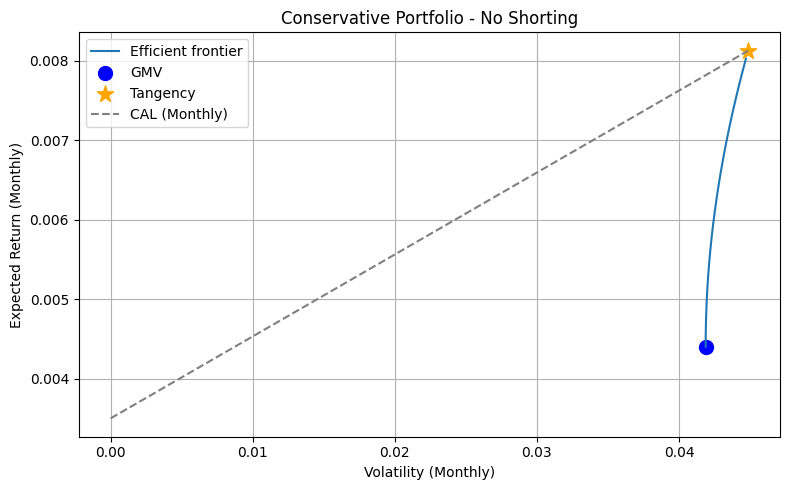

No Shorting
  GMV  -> Return: 5.2806%, Volatility: 14.5073%
  TANG -> Return: 9.7509%, Volatility: 15.5425%, Sharpe: 0.63

  GMV Portfolio Weights:
    IVV: 35.74%
    IXUS: 64.26%

  Tangency Portfolio Weights:
    IVV: 100.00%
    IXUS: 0.00%


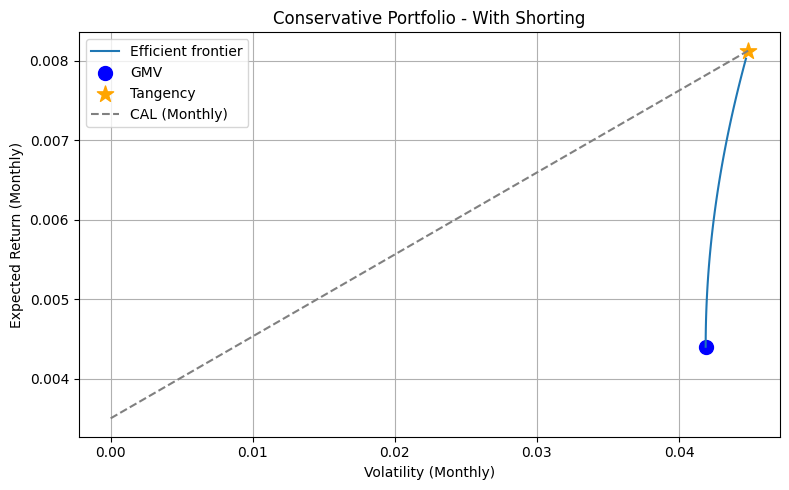

With Shorting
  GMV  -> Return: 5.2806%, Volatility: 14.5073%
  TANG -> Return: 9.7509%, Volatility: 15.5425%, Sharpe: 0.63

  GMV Portfolio Weights:
    IVV: 35.74%
    IXUS: 64.26%

  Tangency Portfolio Weights:
    IVV: 100.00%
    IXUS: 0.00%

--- Balanced Portfolio ---


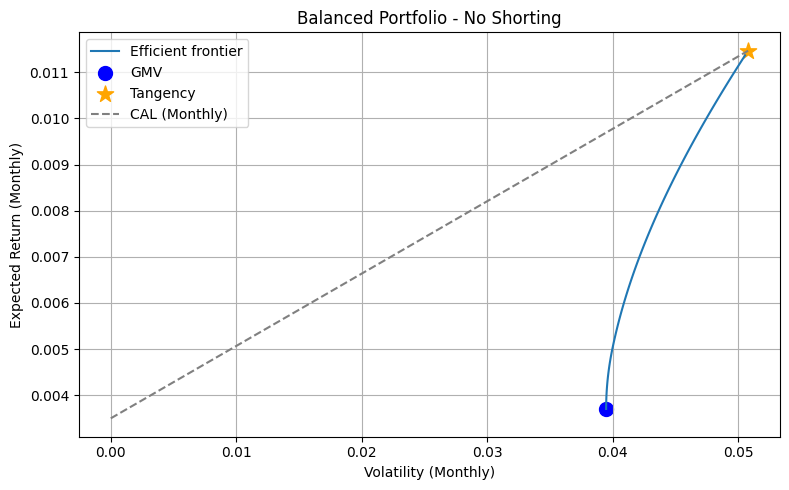

No Shorting
  GMV  -> Return: 4.4443%, Volatility: 13.6761%
  TANG -> Return: 13.7603%, Volatility: 17.5960%, Sharpe: 0.78

  GMV Portfolio Weights:
    IVV: 15.45%
    SPTM: 0.00%
    VONG: 0.00%
    IXUS: 0.00%
    VIGI: 84.55%

  Tangency Portfolio Weights:
    IVV: 0.00%
    SPTM: 0.00%
    VONG: 100.00%
    IXUS: -0.00%
    VIGI: -0.00%


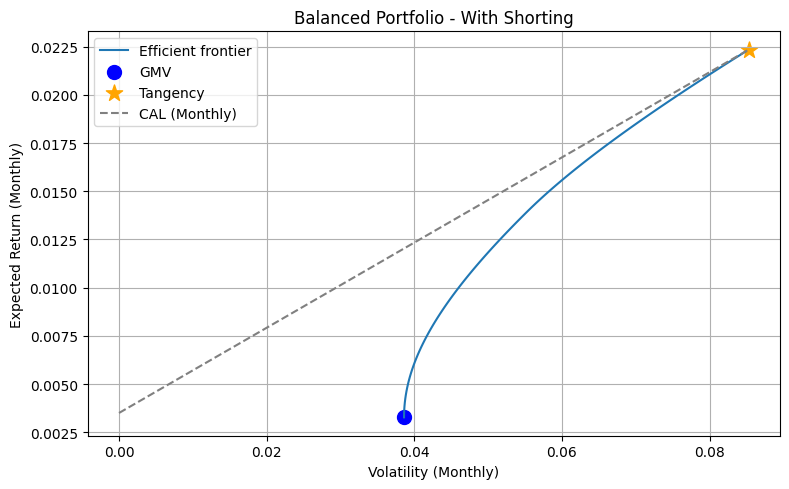

With Shorting
  GMV  -> Return: 3.9284%, Volatility: 13.3742%
  TANG -> Return: 26.8080%, Volatility: 29.5380%, Sharpe: 0.91

  GMV Portfolio Weights:
    IVV: 100.00%
    SPTM: -41.24%
    VONG: -33.84%
    IXUS: -24.93%
    VIGI: 100.00%

  Tangency Portfolio Weights:
    IVV: 100.00%
    SPTM: 100.00%
    VONG: 100.00%
    IXUS: -100.00%
    VIGI: -100.00%

--- Growth Portfolio ---


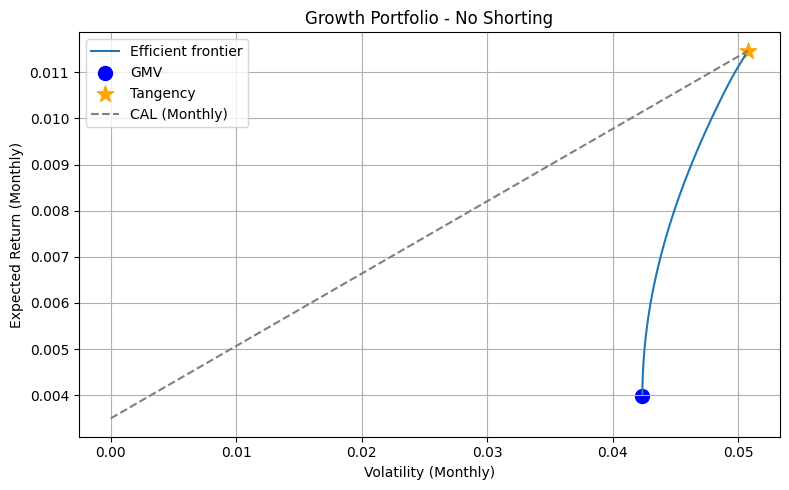

No Shorting
  GMV  -> Return: 4.7901%, Volatility: 14.6773%
  TANG -> Return: 13.7603%, Volatility: 17.5960%, Sharpe: 0.78

  GMV Portfolio Weights:
    VONG: 18.20%
    VBR: 0.00%
    IXUS: 81.80%
    CGW: 0.00%
    VOE: 0.00%

  Tangency Portfolio Weights:
    VONG: 100.00%
    VBR: 0.00%
    IXUS: 0.00%
    CGW: 0.00%
    VOE: 0.00%


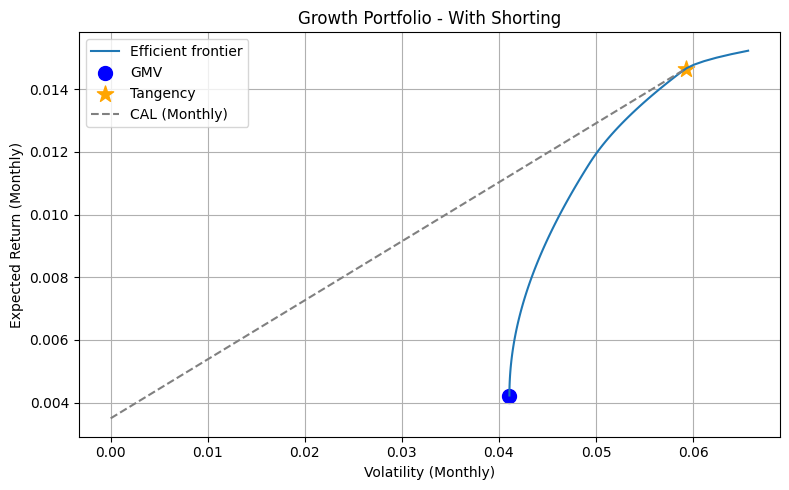

With Shorting
  GMV  -> Return: 5.0744%, Volatility: 14.2314%
  TANG -> Return: 17.5936%, Volatility: 20.5352%, Sharpe: 0.86

  GMV Portfolio Weights:
    VONG: 24.38%
    VBR: -62.54%
    IXUS: 79.64%
    CGW: 2.47%
    VOE: 56.06%

  Tangency Portfolio Weights:
    VONG: 100.00%
    VBR: -55.51%
    IXUS: -100.00%
    CGW: 100.00%
    VOE: 55.51%

--- All_Weather Portfolio ---


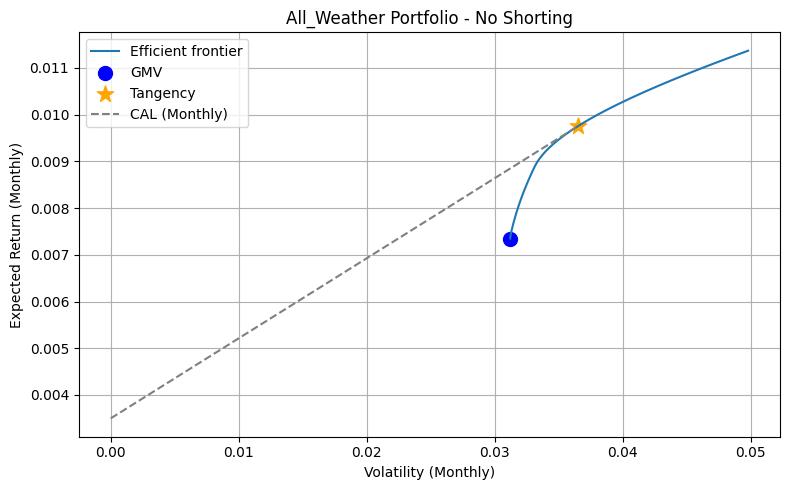

No Shorting
  GMV  -> Return: 8.8178%, Volatility: 10.8089%
  TANG -> Return: 11.7075%, Volatility: 12.6481%, Sharpe: 0.93

  GMV Portfolio Weights:
    IVV: 5.96%
    VONG: 0.00%
    VXUS: -0.00%
    CGW: -0.00%
    SPTM: 36.85%
    GLD: 57.19%

  Tangency Portfolio Weights:
    IVV: 0.00%
    VONG: 62.82%
    VXUS: 0.00%
    CGW: 0.00%
    SPTM: 0.00%
    GLD: 37.18%


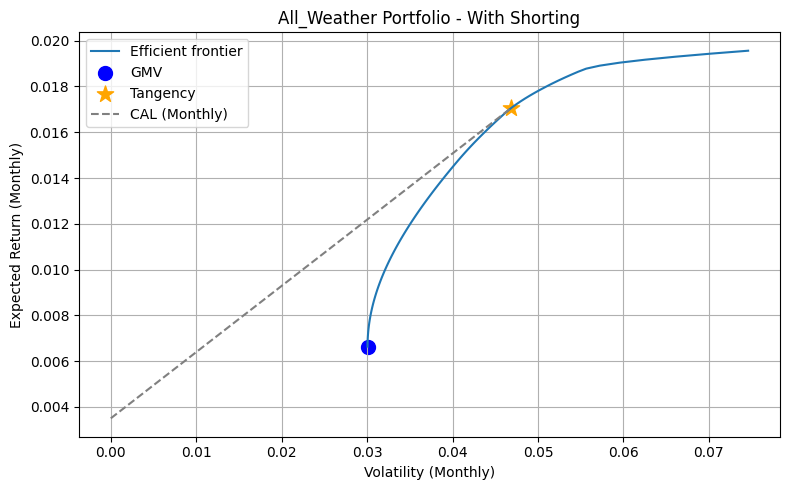

With Shorting
  GMV  -> Return: 7.9616%, Volatility: 10.4106%
  TANG -> Return: 20.4581%, Volatility: 16.2208%, Sharpe: 1.26

  GMV Portfolio Weights:
    IVV: 67.17%
    VONG: -39.34%
    VXUS: 0.73%
    CGW: -29.17%
    SPTM: 40.24%
    GLD: 60.37%

  Tangency Portfolio Weights:
    IVV: -49.06%
    VONG: 100.00%
    VXUS: -100.00%
    CGW: -33.21%
    SPTM: 100.00%
    GLD: 82.27%


In [ ]:
##ADDED GLD IN THE ALL WEATHER PORTFOLIO, REMOVED BONDS AND BITB

# Load monthly excess return data
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns', index_col=0)
data.dropna(inplace=True)

# Monthly risk-free rate (0.35% per month)
rf = 0.0035

# Define bond-free, BITB-free ETF buckets
buckets = {
    "Conservative": ["IVV", "IXUS"],
    "Balanced": ["IVV", "SPTM", "VONG", "IXUS", "VIGI"],
    "Growth": ["VONG", "VBR", "IXUS", "CGW", "VOE"],
    "All_Weather": ["IVV", "VONG", "VXUS", "CGW", "SPTM", "GLD"]
}

# Iterate through each portfolio bucket
for name, tickers in buckets.items():
    print(f"\n--- {name} Portfolio ---")

    df = data[tickers].dropna()
    mu = df.mean()      # Monthly excess return
    S = df.cov()        # Monthly covariance

    for shorting in [False, True]:
        label = "With Shorting" if shorting else "No Shorting"
        bounds = (-1, 1) if shorting else (0, 1)

        # Frontier for plotting
        ef_plot = EfficientFrontier(mu, S, weight_bounds=bounds)

        # GMV Portfolio
        ef_gmv = EfficientFrontier(mu, S, weight_bounds=bounds)
        w_gmv = ef_gmv.min_volatility()
        ret_gmv, vol_gmv, _ = ef_gmv.portfolio_performance(risk_free_rate=rf)

        # Tangency (Max Sharpe)
        ef_tan = EfficientFrontier(mu, S, weight_bounds=bounds)
        w_tan = ef_tan.max_sharpe(risk_free_rate=rf)
        ret_tan, vol_tan, sharpe_tan = ef_tan.portfolio_performance(risk_free_rate=rf)

        # Plot
        fig, ax = plt.subplots(figsize=(8, 5))
        plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=False)

        ax.scatter(vol_gmv, ret_gmv, marker="o", color='blue', s=100, label="GMV")
        ax.scatter(vol_tan, ret_tan, marker="*", color='orange', s=150, label="Tangency")

        # CAL Line
        x = np.linspace(0, vol_tan, 100)
        cal = rf + sharpe_tan * x
        ax.plot(x, cal, label='CAL (Monthly)', color='gray', linestyle='--')

        ax.set_title(f"{name} Portfolio - {label}")
        ax.set_xlabel("Volatility (Monthly)")
        ax.set_ylabel("Expected Return (Monthly)")
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()

        # Print Output
        print(f"{label}")
        print(f"  GMV  -> Return: {ret_gmv*12:.4%}, Volatility: {vol_gmv*(12**0.5):.4%}")
        print(f"  TANG -> Return: {ret_tan*12:.4%}, Volatility: {vol_tan*(12**0.5):.4%}, Sharpe: {(ret_tan*12)/(vol_tan*(12**0.5)):.2f}")

        print("\n  GMV Portfolio Weights:")
        for asset, weight in w_gmv.items():
            print(f"    {asset}: {weight:.2%}")

        print("\n  Tangency Portfolio Weights:")
        for asset, weight in w_tan.items():
            print(f"    {asset}: {weight:.2%}")




--- Conservative Portfolio ---


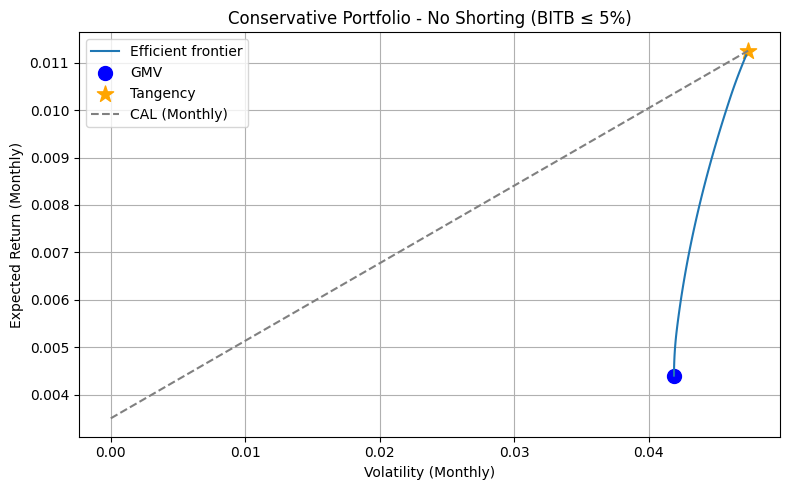

No Shorting
  GMV  -> Return: 5.2806%, Volatility: 14.5073%
  TANG -> Return: 13.5048%, Volatility: 16.4166%, Sharpe: 0.82

  GMV Portfolio Weights:
    IVV: 35.74%
    IXUS: 64.26%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 95.00%
    IXUS: 0.00%
    BITB: 5.00%


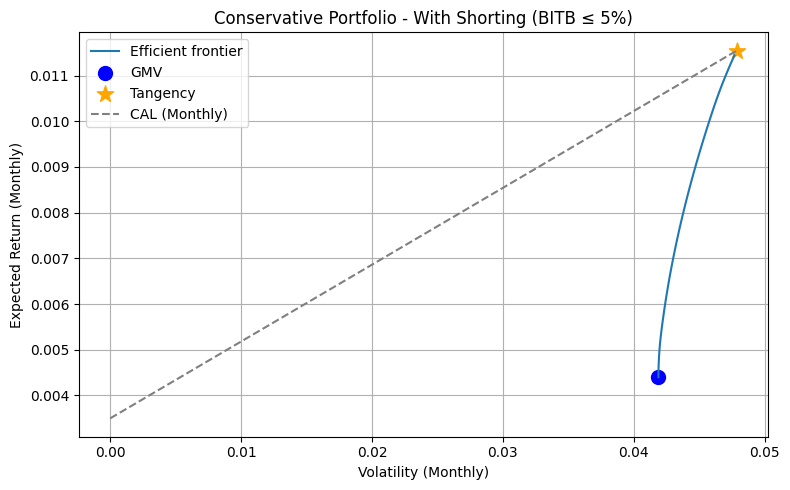

With Shorting
  GMV  -> Return: 5.2806%, Volatility: 14.5073%
  TANG -> Return: 13.8526%, Volatility: 16.5742%, Sharpe: 0.84

  GMV Portfolio Weights:
    IVV: 35.74%
    IXUS: 64.26%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 100.00%
    IXUS: -5.00%
    BITB: 5.00%

--- Balanced Portfolio ---


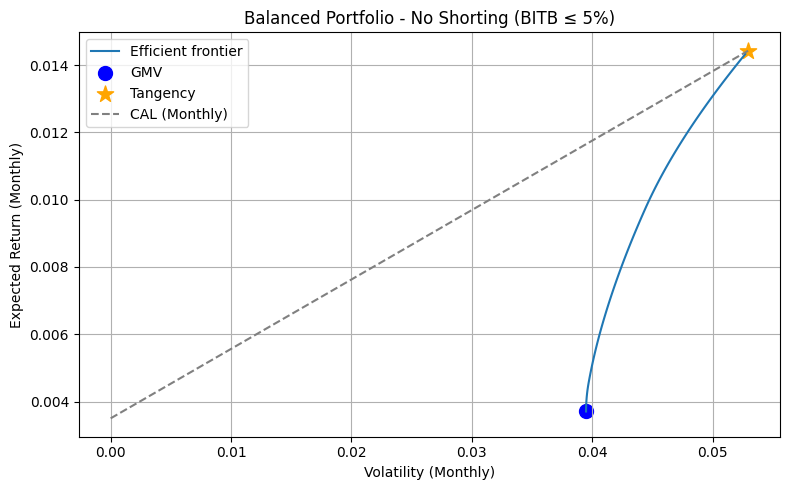

No Shorting
  GMV  -> Return: 4.4443%, Volatility: 13.6761%
  TANG -> Return: 17.3137%, Volatility: 18.3386%, Sharpe: 0.94

  GMV Portfolio Weights:
    IVV: 15.45%
    SPTM: 0.00%
    VONG: 0.00%
    IXUS: 0.00%
    VIGI: 84.55%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 0.00%
    SPTM: 0.00%
    VONG: 95.00%
    IXUS: 0.00%
    VIGI: 0.00%
    BITB: 5.00%


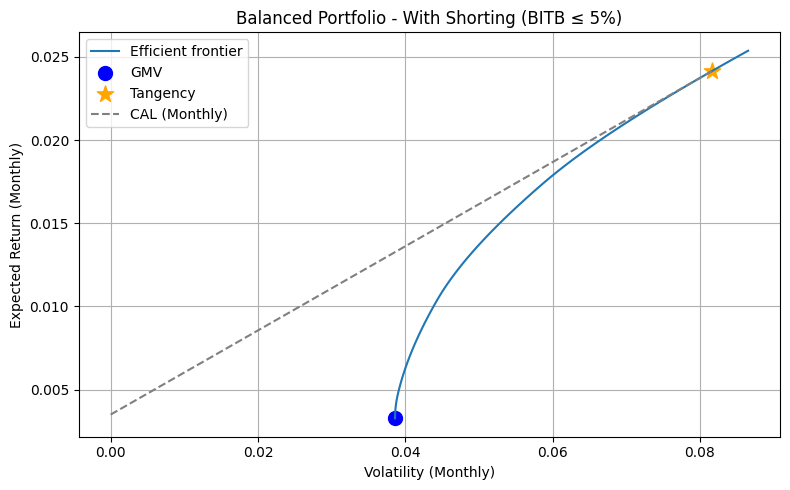

With Shorting
  GMV  -> Return: 3.9284%, Volatility: 13.3742%
  TANG -> Return: 29.0025%, Volatility: 28.2995%, Sharpe: 1.02

  GMV Portfolio Weights:
    IVV: 100.00%
    SPTM: -41.24%
    VONG: -33.84%
    IXUS: -24.93%
    VIGI: 100.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 100.00%
    SPTM: 69.25%
    VONG: 100.00%
    IXUS: -100.00%
    VIGI: -74.25%
    BITB: 5.00%

--- Growth Portfolio ---


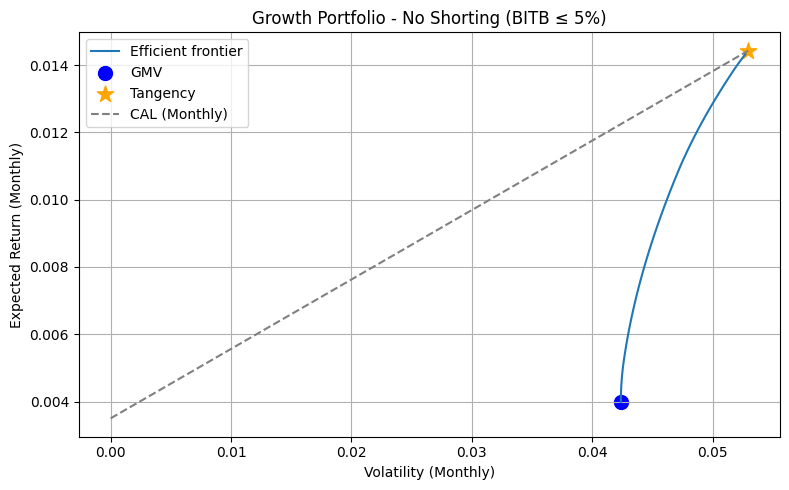

No Shorting
  GMV  -> Return: 4.7901%, Volatility: 14.6773%
  TANG -> Return: 17.3137%, Volatility: 18.3386%, Sharpe: 0.94

  GMV Portfolio Weights:
    VONG: 18.20%
    VBR: 0.00%
    IXUS: 81.80%
    CGW: 0.00%
    VOE: 0.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    VONG: 95.00%
    VBR: 0.00%
    IXUS: 0.00%
    CGW: 0.00%
    VOE: 0.00%
    BITB: 5.00%


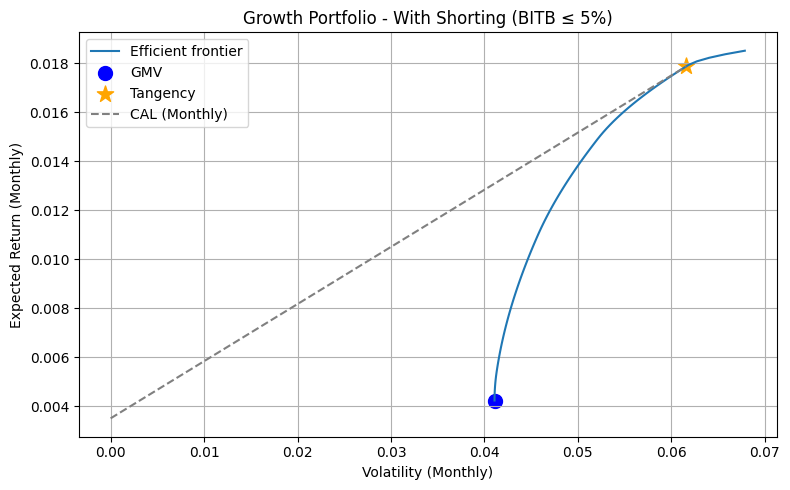

With Shorting
  GMV  -> Return: 5.0744%, Volatility: 14.2314%
  TANG -> Return: 21.4525%, Volatility: 21.3392%, Sharpe: 1.01

  GMV Portfolio Weights:
    VONG: 24.38%
    VBR: -62.54%
    IXUS: 79.64%
    CGW: 2.47%
    VOE: 56.06%
    BITB: 0.00%

  Tangency Portfolio Weights:
    VONG: 100.00%
    VBR: -67.24%
    IXUS: -100.00%
    CGW: 96.61%
    VOE: 65.63%
    BITB: 5.00%

--- All_Weather Portfolio ---


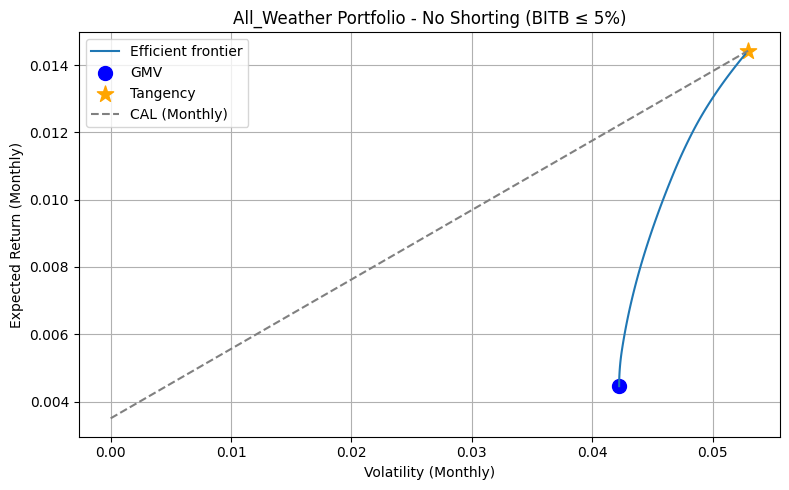

No Shorting
  GMV  -> Return: 5.3479%, Volatility: 14.6278%
  TANG -> Return: 17.3137%, Volatility: 18.3386%, Sharpe: 0.94

  GMV Portfolio Weights:
    IVV: 38.72%
    VONG: 0.00%
    VXUS: 61.28%
    CGW: 0.00%
    SPTM: 0.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 0.00%
    VONG: 95.00%
    VXUS: 0.00%
    CGW: 0.00%
    SPTM: 0.00%
    BITB: 5.00%


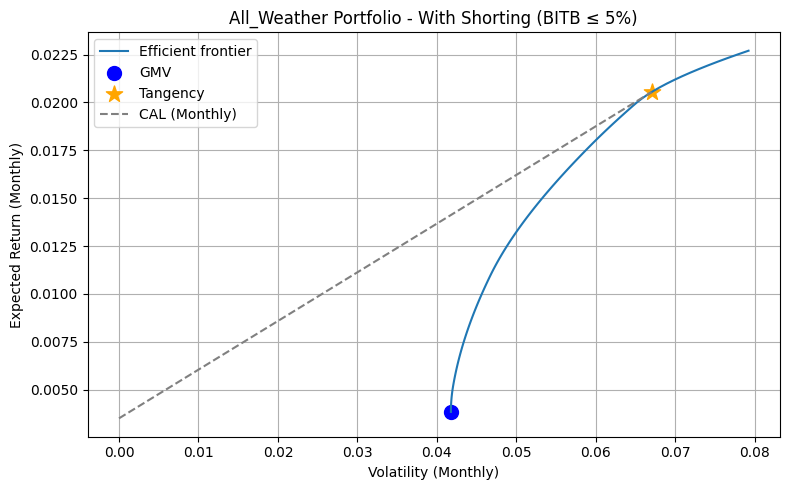

With Shorting
  GMV  -> Return: 4.6034%, Volatility: 14.4666%
  TANG -> Return: 24.6467%, Volatility: 23.2160%, Sharpe: 1.06

  GMV Portfolio Weights:
    IVV: 100.00%
    VONG: -19.60%
    VXUS: 63.40%
    CGW: -4.24%
    SPTM: -39.56%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 100.00%
    VONG: 100.00%
    VXUS: -100.00%
    CGW: 2.33%
    SPTM: -7.33%
    BITB: 5.00%


In [ ]:
#BITB CAPPED AT 5%, NO BONDS

# Load monthly excess return data
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns', index_col=0)
data.dropna(inplace=True)

# Monthly risk-free rate (0.35%)
rf = 0.0035

# Bond-free ETF buckets with BITB (capped at 5%)
buckets = {
    "Conservative": ["IVV", "IXUS", "BITB"],
    "Balanced": ["IVV", "SPTM", "VONG", "IXUS", "VIGI", "BITB"],
    "Growth": ["VONG", "VBR", "IXUS", "CGW", "VOE", "BITB"],
    "All_Weather": ["IVV", "VONG", "VXUS", "CGW", "SPTM", "BITB"]
}

# Iterate through each portfolio bucket
for name, tickers in buckets.items():
    print(f"\n--- {name} Portfolio ---")

    df = data[tickers].dropna()
    mu = df.mean()      # Monthly excess returns
    S = df.cov()        # Monthly covariance

    for shorting in [False, True]:
        label = "With Shorting" if shorting else "No Shorting"
        bounds = (-1, 1) if shorting else (0, 1)

        # Set up custom weight bounds per asset
        weight_bounds = []
        for ticker in tickers:
            if ticker == "BITB":
                weight_bounds.append((0, 0.05))  # Max 5%
            else:
                weight_bounds.append(bounds)

        # Frontier for plotting
        ef_plot = EfficientFrontier(mu, S, weight_bounds=weight_bounds)

        # GMV
        ef_gmv = EfficientFrontier(mu, S, weight_bounds=weight_bounds)
        w_gmv = ef_gmv.min_volatility()
        ret_gmv, vol_gmv, _ = ef_gmv.portfolio_performance(risk_free_rate=rf)

        # Tangency (Max Sharpe)
        ef_tan = EfficientFrontier(mu, S, weight_bounds=weight_bounds)
        w_tan = ef_tan.max_sharpe(risk_free_rate=rf)
        ret_tan, vol_tan, sharpe_tan = ef_tan.portfolio_performance(risk_free_rate=rf)

        # Plotting
        fig, ax = plt.subplots(figsize=(8, 5))
        plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=False)
        ax.scatter(vol_gmv, ret_gmv, marker="o", color='blue', s=100, label="GMV")
        ax.scatter(vol_tan, ret_tan, marker="*", color='orange', s=150, label="Tangency")

        # CAL Line
        x = np.linspace(0, vol_tan, 100)
        cal = rf + sharpe_tan * x
        ax.plot(x, cal, label='CAL (Monthly)', color='gray', linestyle='--')

        ax.set_title(f"{name} Portfolio - {label} (BITB ≤ 5%)")
        ax.set_xlabel("Volatility (Monthly)")
        ax.set_ylabel("Expected Return (Monthly)")
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()

        # Print Output
        print(f"{label}")
        print(f"  GMV  -> Return: {ret_gmv*12:.4%}, Volatility: {vol_gmv*(12**0.5):.4%}")
        print(f"  TANG -> Return: {ret_tan*12:.4%}, Volatility: {vol_tan*(12**0.5):.4%}, Sharpe: {(ret_tan*12)/(vol_tan*(12**0.5)):.2f}")

        print("\n  GMV Portfolio Weights:")
        for asset, weight in w_gmv.items():
            print(f"    {asset}: {weight:.2%}")

        print("\n  Tangency Portfolio Weights:")
        for asset, weight in w_tan.items():
            print(f"    {asset}: {weight:.2%}")



--- Conservative Portfolio ---

❌ Optimization failed for Conservative - No Shorting: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')

❌ Optimization failed for Conservative - With Shorting: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')

--- Balanced Portfolio ---


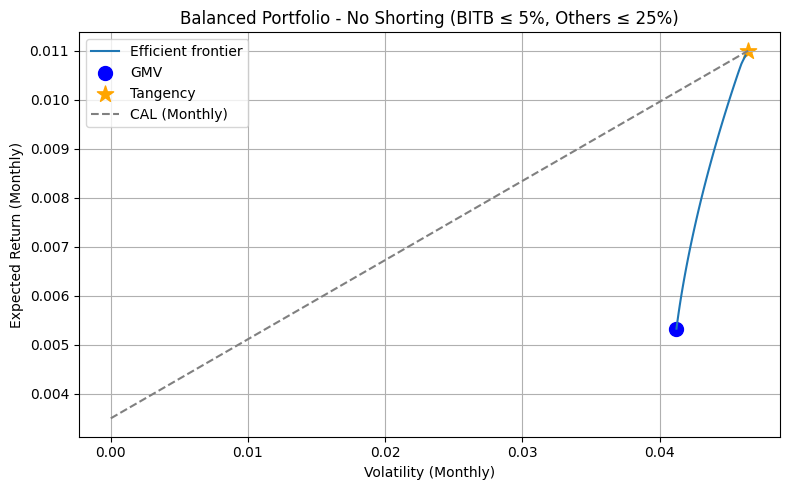

No Shorting
  GMV  -> Return: 6.3966%, Volatility: 14.2846%
  TANG -> Return: 13.2055%, Volatility: 16.0941%, Sharpe: 0.82

  GMV Portfolio Weights:
    IVV: 25.00%
    SPTM: 25.00%
    VONG: -0.00%
    IXUS: 25.00%
    VIGI: 25.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 25.00%
    SPTM: 25.00%
    VONG: 25.00%
    IXUS: 0.00%
    VIGI: 20.00%
    BITB: 5.00%


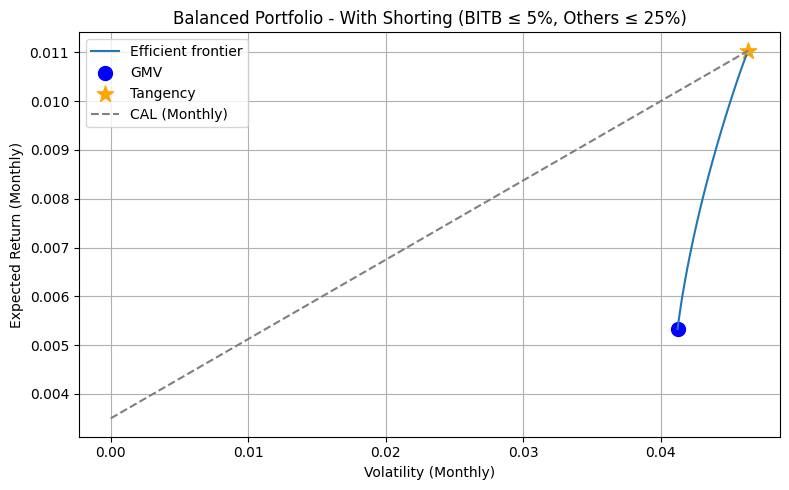

With Shorting
  GMV  -> Return: 6.3962%, Volatility: 14.2846%
  TANG -> Return: 13.2395%, Volatility: 16.0634%, Sharpe: 0.82

  GMV Portfolio Weights:
    IVV: 25.00%
    SPTM: 25.00%
    VONG: 0.00%
    IXUS: 25.00%
    VIGI: 25.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 25.00%
    SPTM: 25.00%
    VONG: 25.00%
    IXUS: -5.00%
    VIGI: 25.00%
    BITB: 5.00%

--- Growth Portfolio ---


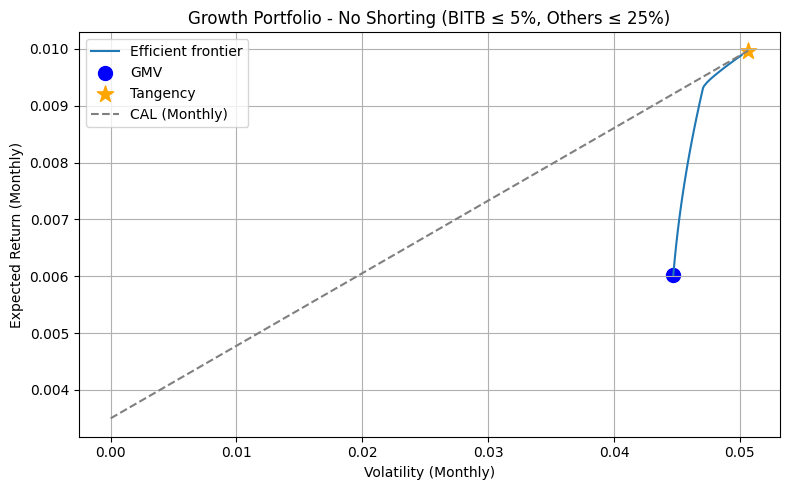

No Shorting
  GMV  -> Return: 7.2269%, Volatility: 15.4898%
  TANG -> Return: 11.9608%, Volatility: 17.5486%, Sharpe: 0.68

  GMV Portfolio Weights:
    VONG: 25.00%
    VBR: -0.00%
    IXUS: 25.00%
    CGW: 25.00%
    VOE: 25.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    VONG: 25.00%
    VBR: 20.00%
    IXUS: 0.00%
    CGW: 25.00%
    VOE: 25.00%
    BITB: 5.00%


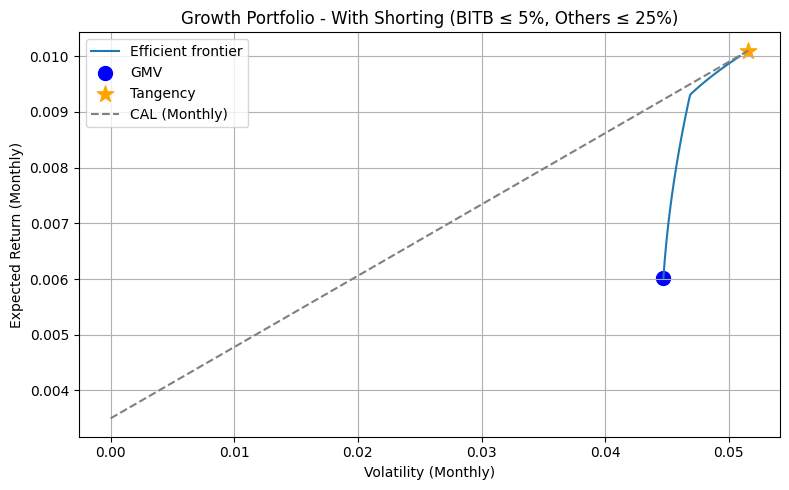

With Shorting
  GMV  -> Return: 7.2268%, Volatility: 15.4898%
  TANG -> Return: 12.1189%, Volatility: 17.8631%, Sharpe: 0.68

  GMV Portfolio Weights:
    VONG: 25.00%
    VBR: 0.00%
    IXUS: 25.00%
    CGW: 25.00%
    VOE: 25.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    VONG: 25.00%
    VBR: 25.00%
    IXUS: -5.00%
    CGW: 25.00%
    VOE: 25.00%
    BITB: 5.00%

--- All_Weather Portfolio ---


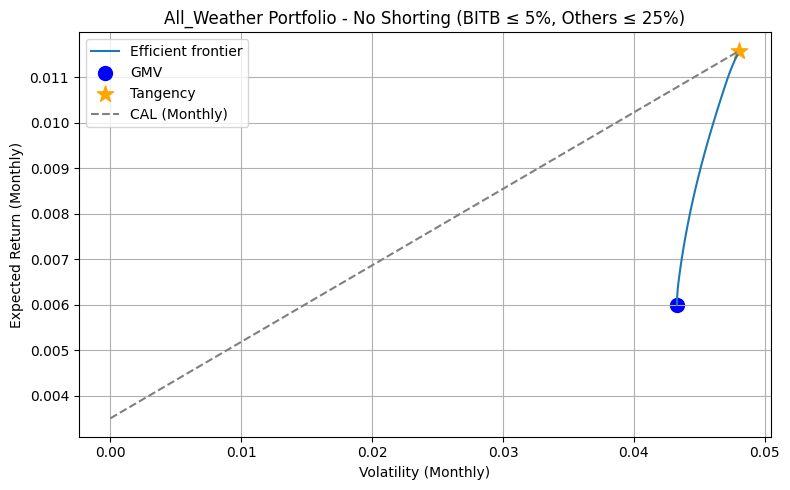

No Shorting
  GMV  -> Return: 7.1990%, Volatility: 14.9983%
  TANG -> Return: 13.8933%, Volatility: 16.6501%, Sharpe: 0.83

  GMV Portfolio Weights:
    IVV: 25.00%
    VONG: 0.00%
    VXUS: 25.00%
    CGW: 25.00%
    SPTM: 25.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 25.00%
    VONG: 25.00%
    VXUS: 0.00%
    CGW: 20.00%
    SPTM: 25.00%
    BITB: 5.00%


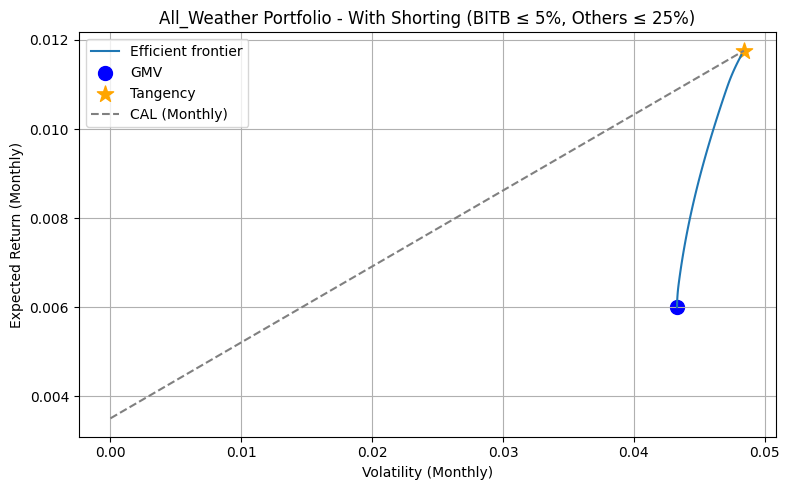

With Shorting
  GMV  -> Return: 7.1990%, Volatility: 14.9983%
  TANG -> Return: 14.1107%, Volatility: 16.7669%, Sharpe: 0.84

  GMV Portfolio Weights:
    IVV: 25.00%
    VONG: 0.00%
    VXUS: 25.00%
    CGW: 25.00%
    SPTM: 25.00%
    BITB: 0.00%

  Tangency Portfolio Weights:
    IVV: 25.00%
    VONG: 25.00%
    VXUS: -5.00%
    CGW: 25.00%
    SPTM: 25.00%
    BITB: 5.00%


In [ ]:
#MAX EXPOSURE IN EACH ASSET CAPPED AT 25%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, plotting

# Load monthly excess return data
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns', index_col=0)
data.dropna(inplace=True)

# Monthly risk-free rate (0.35%)
rf = 0.0035

# Bond-free ETF buckets including BITB
buckets = {
    "Conservative": ["IVV", "IXUS", "BITB"],
    "Balanced": ["IVV", "SPTM", "VONG", "IXUS", "VIGI", "BITB"],
    "Growth": ["VONG", "VBR", "IXUS", "CGW", "VOE", "BITB"],
    "All_Weather": ["IVV", "VONG", "VXUS", "CGW", "SPTM", "BITB"]
}

# Helper to build feasible weight bounds
def get_weight_bounds(tickers, shorting=False):
    base_limit = 0.25
    rf_bounds = (-1, 1) if shorting else (0, 1)

    bounds = []
    for t in tickers:
        if t == "BITB":
            bounds.append((0, 0.05))
        else:
            bounds.append((rf_bounds[0], base_limit))

    # Check if total upper bound < 1.0 → loosen evenly
    total_max = sum([b[1] for b in bounds])
    if total_max < 1.0:
        n = len(bounds)
        relaxed_limit = 1.0 / n
        bounds = [(0, 0.05) if t == "BITB" else (rf_bounds[0], max(relaxed_limit, base_limit)) for t in tickers]

    return bounds

# Run optimization
for name, tickers in buckets.items():
    print(f"\n--- {name} Portfolio ---")
    df = data[tickers].dropna()
    mu = df.mean()
    S = df.cov()

    for shorting in [False, True]:
        label = "With Shorting" if shorting else "No Shorting"
        bounds = get_weight_bounds(tickers, shorting=shorting)

        try:
            # Efficient frontier for plotting
            ef_plot = EfficientFrontier(mu, S, weight_bounds=bounds)

            # GMV
            ef_gmv = EfficientFrontier(mu, S, weight_bounds=bounds)
            w_gmv = ef_gmv.min_volatility()
            ret_gmv, vol_gmv, _ = ef_gmv.portfolio_performance(risk_free_rate=rf)

            # Tangency
            ef_tan = EfficientFrontier(mu, S, weight_bounds=bounds)
            w_tan = ef_tan.max_sharpe(risk_free_rate=rf)
            ret_tan, vol_tan, sharpe_tan = ef_tan.portfolio_performance(risk_free_rate=rf)

            # Plot
            fig, ax = plt.subplots(figsize=(8, 5))
            plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=False)
            ax.scatter(vol_gmv, ret_gmv, marker="o", color='blue', s=100, label="GMV")
            ax.scatter(vol_tan, ret_tan, marker="*", color='orange', s=150, label="Tangency")

            x = np.linspace(0, vol_tan, 100)
            cal = rf + sharpe_tan * x
            ax.plot(x, cal, label='CAL (Monthly)', color='gray', linestyle='--')

            ax.set_title(f"{name} Portfolio - {label} (BITB ≤ 5%, Others ≤ 25%)")
            ax.set_xlabel("Volatility (Monthly)")
            ax.set_ylabel("Expected Return (Monthly)")
            ax.legend()
            ax.grid(True)
            plt.tight_layout()
            plt.show()

            # Print output
            #print(f"{label}")
            #print(f"  GMV  -> Return: {ret_gmv:.4%}, Volatility: {vol_gmv:.4%}")
            #print(f"  TANG -> Return: {ret_tan:.4%}, Volatility: {vol_tan:.4%}, Sharpe: {sharpe_tan:.2f}")
            # Print Output
            print(f"{label}")
            print(f"  GMV  -> Return: {ret_gmv*12:.4%}, Volatility: {vol_gmv*(12**0.5):.4%}")
            print(f"  TANG -> Return: {ret_tan*12:.4%}, Volatility: {vol_tan*(12**0.5):.4%}, Sharpe: {(ret_tan*12)/(vol_tan*(12**0.5)):.2f}")

            print("\n  GMV Portfolio Weights:")
            for asset, weight in w_gmv.items():
                print(f"    {asset}: {weight:.2%}")

            print("\n  Tangency Portfolio Weights:")
            for asset, weight in w_tan.items():
                print(f"    {asset}: {weight:.2%}")

        except Exception as e:
            print(f"\n❌ Optimization failed for {name} - {label}: {e}")




--- Conservative Portfolio ---


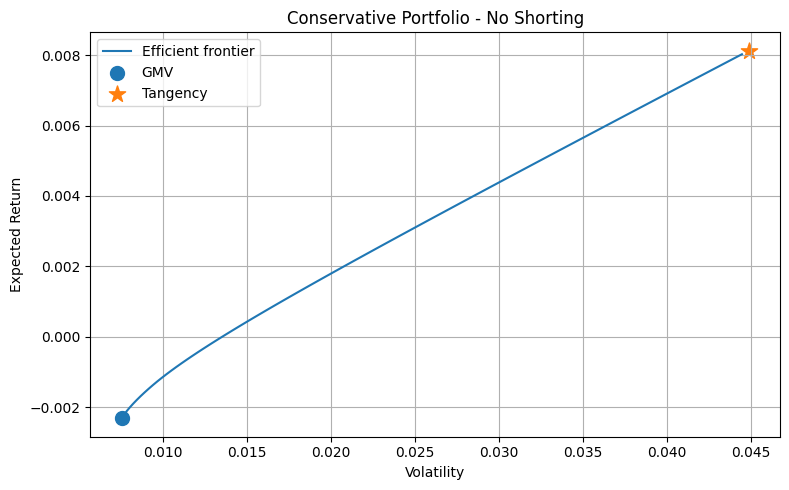

No Shorting
  GMV  -> Return: -2.7847%, Volatility: 2.6109%
  TANG -> Return: 9.7509%, Volatility: 15.5425%, Sharpe: 0.63

  GMV Portfolio Weights:
    IVV: 0.00%
    IXUS: 0.00%
    AGG: 0.00%
    VTIP: 68.31%
    VCSH: 31.69%

  Tangency Portfolio Weights:
    IVV: 100.00%
    IXUS: 0.00%
    AGG: 0.00%
    VTIP: 0.00%
    VCSH: 0.00%


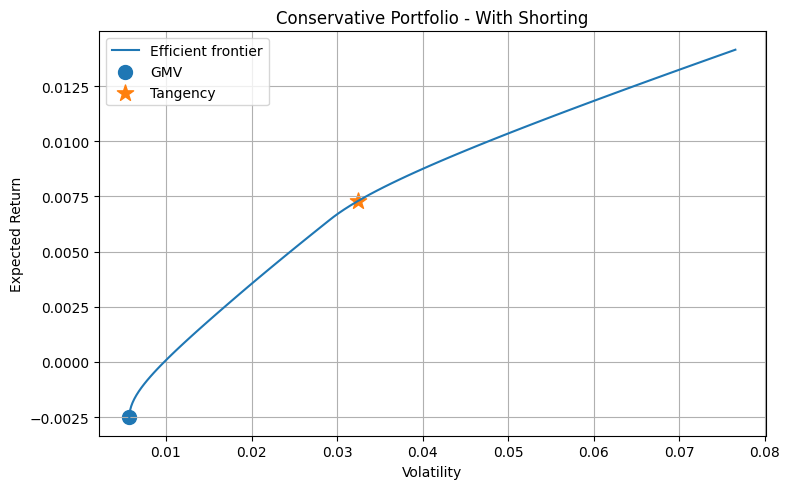

With Shorting
  GMV  -> Return: -3.0134%, Volatility: 1.9788%
  TANG -> Return: 8.7480%, Volatility: 11.2329%, Sharpe: 0.78

  GMV Portfolio Weights:
    IVV: -0.03%
    IXUS: -9.83%
    AGG: -35.83%
    VTIP: 46.13%
    VCSH: 99.57%

  Tangency Portfolio Weights:
    IVV: 100.00%
    IXUS: -43.61%
    AGG: -100.00%
    VTIP: 100.00%
    VCSH: 43.61%

--- Balanced Portfolio ---


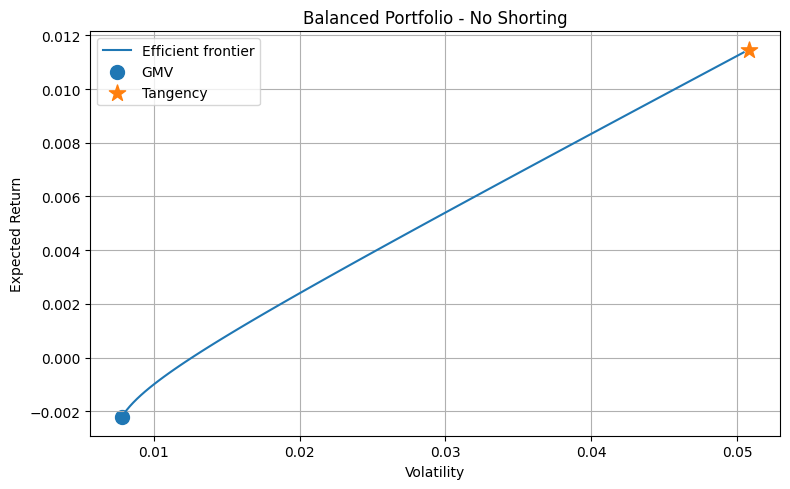

No Shorting
  GMV  -> Return: -2.6743%, Volatility: 2.7028%
  TANG -> Return: 13.7606%, Volatility: 17.5962%, Sharpe: 0.78

  GMV Portfolio Weights:
    IVV: -0.00%
    SPTM: -0.00%
    VONG: 0.00%
    VO: 0.00%
    IXUS: -0.00%
    VIGI: -0.00%
    VCLT: 0.00%
    VTEB: -0.00%
    VTIP: 100.00%

  Tangency Portfolio Weights:
    IVV: 0.00%
    SPTM: 0.00%
    VONG: 100.00%
    VO: 0.00%
    IXUS: -0.00%
    VIGI: -0.00%
    VCLT: -0.00%
    VTEB: -0.00%
    VTIP: -0.00%


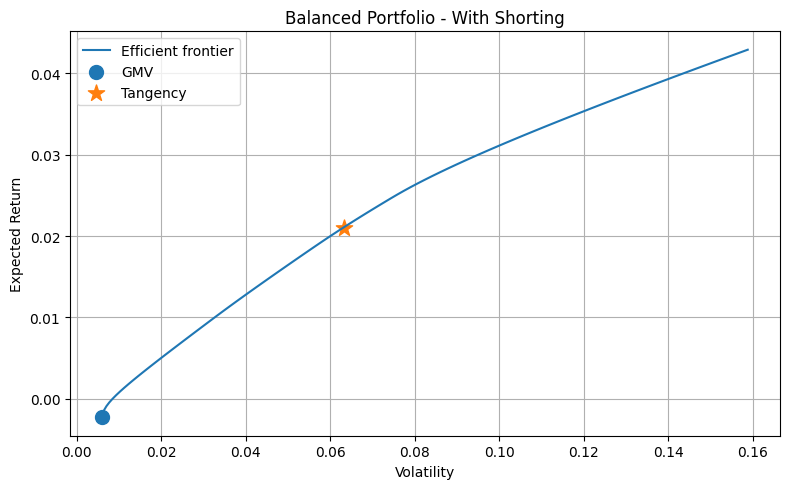

With Shorting
  GMV  -> Return: -2.7551%, Volatility: 2.1151%
  TANG -> Return: 25.2578%, Volatility: 21.8909%, Sharpe: 1.15

  GMV Portfolio Weights:
    IVV: 17.99%
    SPTM: -5.43%
    VONG: -7.81%
    VO: -0.26%
    IXUS: -1.82%
    VIGI: -5.32%
    VCLT: -18.41%
    VTEB: 37.83%
    VTIP: 83.25%

  Tangency Portfolio Weights:
    IVV: 100.00%
    SPTM: 60.29%
    VONG: 100.00%
    VO: -100.00%
    IXUS: -100.00%
    VIGI: 86.66%
    VCLT: -100.00%
    VTEB: -4.39%
    VTIP: 57.44%

--- Growth Portfolio ---


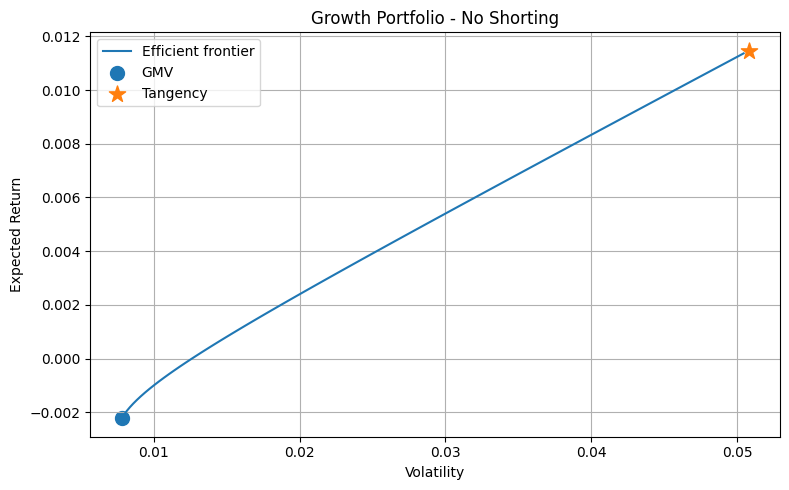

No Shorting
  GMV  -> Return: -2.6743%, Volatility: 2.7028%
  TANG -> Return: 13.7603%, Volatility: 17.5959%, Sharpe: 0.78

  GMV Portfolio Weights:
    VONG: 0.00%
    VBR: 0.00%
    IXUS: 0.00%
    CGW: 0.00%
    VOE: 0.00%
    AGG: 0.00%
    VTEB: 0.00%
    VTIP: 100.00%

  Tangency Portfolio Weights:
    VONG: 100.00%
    VBR: -0.00%
    IXUS: -0.00%
    CGW: -0.00%
    VOE: -0.00%
    AGG: 0.00%
    VTEB: 0.00%
    VTIP: 0.00%


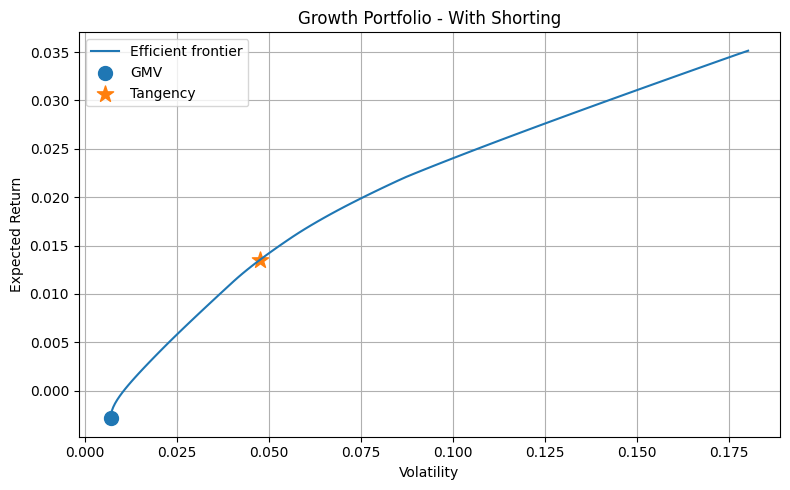

With Shorting
  GMV  -> Return: -3.4295%, Volatility: 2.4003%
  TANG -> Return: 16.2400%, Volatility: 16.4583%, Sharpe: 0.99

  GMV Portfolio Weights:
    VONG: -2.08%
    VBR: -0.60%
    IXUS: -6.95%
    CGW: -5.99%
    VOE: 6.69%
    AGG: -12.53%
    VTEB: 21.47%
    VTIP: 100.00%

  Tangency Portfolio Weights:
    VONG: 100.00%
    VBR: -61.84%
    IXUS: -68.09%
    CGW: 67.98%
    VOE: 44.42%
    AGG: -100.00%
    VTEB: 17.53%
    VTIP: 100.00%

--- All_Weather Portfolio ---


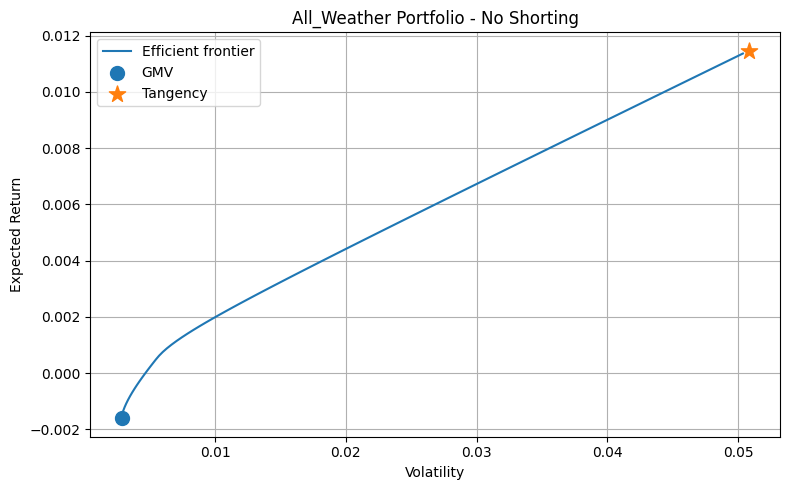

No Shorting
  GMV  -> Return: -1.9324%, Volatility: 0.9899%
  TANG -> Return: 13.7603%, Volatility: 17.5960%, Sharpe: 0.78

  GMV Portfolio Weights:
    IVV: -0.00%
    VONG: -0.00%
    VXUS: -0.00%
    VCLT: 0.00%
    AGG: 0.00%
    VTIP: 2.46%
    MINT: 60.48%
    JPLD: 37.07%

  Tangency Portfolio Weights:
    IVV: 0.00%
    VONG: 100.00%
    VXUS: -0.00%
    VCLT: -0.00%
    AGG: -0.00%
    VTIP: 0.00%
    MINT: 0.00%
    JPLD: 0.00%


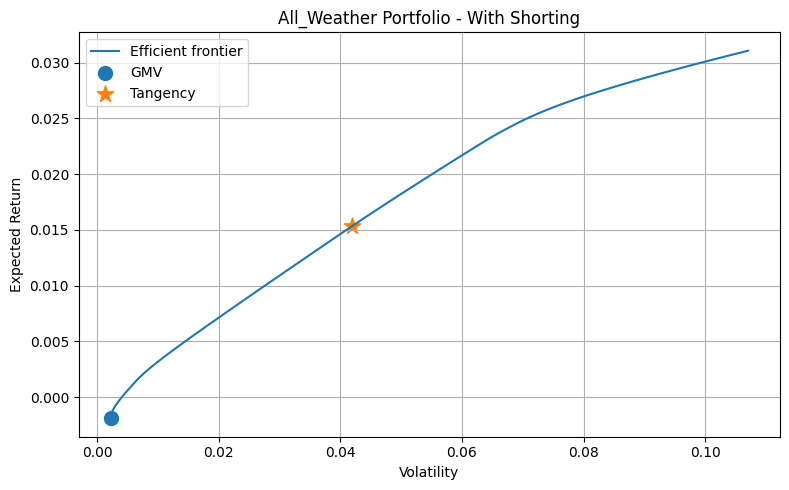

With Shorting
  GMV  -> Return: -2.2918%, Volatility: 0.7740%
  TANG -> Return: 18.3857%, Volatility: 14.5137%, Sharpe: 1.27

  GMV Portfolio Weights:
    IVV: 5.89%
    VONG: -3.19%
    VXUS: -2.41%
    VCLT: -11.96%
    AGG: 24.78%
    VTIP: -0.62%
    MINT: 61.98%
    JPLD: 25.53%

  Tangency Portfolio Weights:
    IVV: 18.28%
    VONG: 100.00%
    VXUS: -27.40%
    VCLT: -100.00%
    AGG: 39.36%
    VTIP: 48.29%
    MINT: -78.52%
    JPLD: 100.00%


In [ ]:
# Load your excess return data
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns', index_col=0)
data.dropna(inplace=True)  # Clean any missing values

# Define your ETF buckets (cleaned for precise tickers)
buckets = {
    "Conservative": ["IVV", "IXUS", "AGG", "VTIP", "VCSH"],
    "Balanced": ["IVV", "SPTM", "VONG", "VO","IXUS", "VIGI", "VCLT", "VTEB", "VTIP"],
    "Growth": ["VONG", "VBR", "IXUS", "CGW", "VOE", "AGG", "VTEB", "VTIP"],
    "All_Weather": ["IVV", "VONG", "VXUS", "VCLT", "AGG", "VTIP", "MINT", "JPLD"]
}

# Iterate through each portfolio bucket
for name, tickers in buckets.items():
    print(f"\n--- {name} Portfolio ---")

    # Filter the return data for relevant tickers
    df = data[tickers].dropna()

    # Compute expected returns and sample covariance matrix
    mu = df.mean()  # Since you already have excess returns
    S = df.cov()

    for shorting in [False, True]:
        label = "With Shorting" if shorting else "No Shorting"
        bounds = (-1, 1) if shorting else (0, 1)
        ef = EfficientFrontier(mu, S, weight_bounds=bounds)

        # GMV Portfolio
        ef_gmv = EfficientFrontier(mu, S, weight_bounds=bounds)
        w_gmv = ef_gmv.min_volatility()
        ret_gmv, vol_gmv, _ = ef_gmv.portfolio_performance()

        # Tangency (Max Sharpe) Portfolio
        ef_tan = EfficientFrontier(mu, S, weight_bounds=bounds)
        w_tan = ef_tan.max_sharpe()
        ret_tan, vol_tan, sharpe_tan = ef_tan.portfolio_performance()

        # Plot Efficient Frontier
        fig, ax = plt.subplots(figsize=(8, 5))
        plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
        ax.scatter(vol_gmv, ret_gmv, marker="o", s=100, label="GMV")
        ax.scatter(vol_tan, ret_tan, marker="*", s=150, label="Tangency")
        ax.set_title(f"{name} Portfolio - {label}")
        ax.set_xlabel("Volatility")
        ax.set_ylabel("Expected Return")
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()

        # Print summary

        #print(f"{label}")
        #print(f"  GMV  -> Return: {ret_gmv:.2%}, Volatility: {vol_gmv:.2%}")
        #print(f"  TANG -> Return: {ret_tan:.2%}, Volatility: {vol_tan:.2%}, Sharpe: {sharpe_tan:.2f}")

        # Print Output
        print(f"{label}")
        print(f"  GMV  -> Return: {ret_gmv*12:.4%}, Volatility: {vol_gmv*(12**0.5):.4%}")
        print(f"  TANG -> Return: {ret_tan*12:.4%}, Volatility: {vol_tan*(12**0.5):.4%}, Sharpe: {(ret_tan*12)/(vol_tan*(12**0.5)):.2f}")

        print("\n  GMV Portfolio Weights:")
        for asset, weight in w_gmv.items():
            print(f"    {asset}: {weight:.2%}")

        print("\n  Tangency Portfolio Weights:")
        for asset, weight in w_tan.items():
            print(f"    {asset}: {weight:.2%}")

In [ ]:
print((df.mean() * 12).sort_values())  # Annualized excess returns

VXUS    0.025659
CGW     0.069139
SPTM    0.095653
IVV     0.097509
VONG    0.137603
BITB    0.848286
dtype: float64


In [ ]:
print((data.mean() * 12).sort_values())  # Annualized excess returns

VCLT   -0.044997
AGG    -0.042082
VTEB   -0.033352
VCSH   -0.030227
MINT   -0.029089
VTIP   -0.026743
JPLD   -0.002902
RF      0.000000
VXUS    0.025659
IXUS    0.027940
VIGI    0.034746
VGK     0.035886
VOE     0.054391
VBR     0.059554
CGW     0.069139
VO      0.073473
GLD     0.082390
SPTM    0.095653
IVV     0.097509
VONG    0.137603
BITB    0.848286
dtype: float64


In [ ]:
import pandas as pd

# Load monthly excess return data
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns', index_col=0)
data.dropna(inplace=True)

# Define original weighted portfolios
buckets = {
    "Conservative": {
        'IVV': 0.20, 'IXUS': 0.10, 'AGG': 0.29, 'VTIP': 0.195, 'VCSH': 0.195, 'BITB': 0.02
    },
    "Balanced": {
        'IVV': 0.14, 'SPTM': 0.14, 'VONG': 0.095,
        'IXUS': 0.0725, 'VIGI': 0.0725,
        'VCLT': 0.12, 'VTEB': 0.12,
        'VTIP': 0.095, 'MINT': 0.095,
        'BITB': 0.05
    },
    "Growth": {
        'VONG': 0.16, 'VBR': 0.16,
        'IXUS': 0.11, 'CGW': 0.11,
        'VOE': 0.07, 'VBR': 0.07,
        'AGG': 0.09, 'VTEB': 0.09,
        'VTIP': 0.045, 'MINT': 0.045,
        'BITB': 0.09
    },
    "All_Weather": {
        'IVV': 0.0933, 'VONG': 0.0933, 'VXUS': 0.0933,
        'VCLT': 0.14, 'AGG': 0.14,
        'VTIP': 0.1867,
        'MINT': 0.0933, 'JPLD': 0.0933,
        'BITB': 0.0666
    }
}

# Compute portfolio returns
for name, weights in buckets.items():
    tickers = list(weights.keys())
    returns = data[tickers].mean()  # Monthly excess return per ETF
    w = pd.Series(weights)
    monthly_return = (returns * w).sum()
    annualized_return = monthly_return * 12
    print(f"{name} Portfolio Expected Return: {annualized_return:.2%} (Annualized)")


Conservative Portfolio Expected Return: 1.59% (Annualized)
Balanced Portfolio Expected Return: 7.24% (Annualized)
Growth Portfolio Expected Return: 10.77% (Annualized)
All_Weather Portfolio Expected Return: 6.07% (Annualized)


In [ ]:
# Load monthly excess returns
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns', index_col=0)
data.dropna(inplace=True)

# Define equity-only portfolios (with BITB)
buckets = {
    "Conservative": {
        'IVV': 0.20, 'IXUS': 0.10, 'BITB': 0.02
    },
    "Balanced": {
        'IVV': 0.14, 'SPTM': 0.14, 'VONG': 0.095,
        'IXUS': 0.0725, 'VIGI': 0.0725, 'BITB': 0.05
    },
    "Growth": {
        'VONG': 0.16, 'VBR': 0.23,
        'IXUS': 0.11, 'CGW': 0.11, 'VOE': 0.07,
        'BITB': 0.09
    },
    "All_Weather": {
        'IVV': 0.0933, 'VONG': 0.0933, 'VXUS': 0.0933,
        'CGW': 0.0933, 'SPTM': 0.0933, 'BITB': 0.0666
    }
}

# Calculate returns without normalization (raw exposure)
print("=== Portfolio Returns (Equity + BITB Only, Unnormalized Weights) ===\n")
for name, weights in buckets.items():
    tickers = list(weights.keys())
    returns = data[tickers].mean()  # Monthly excess returns
    w = pd.Series(weights)
    monthly_return = (returns * w).sum()
    annualized_return = monthly_return * 12
    print(f"{name} Portfolio Expected Return: {annualized_return:.2%} (Annualized)")


=== Portfolio Returns (Equity + BITB Only, Unnormalized Weights) ===

Conservative Portfolio Expected Return: 3.93% (Annualized)
Balanced Portfolio Expected Return: 8.71% (Annualized)
Growth Portfolio Expected Return: 12.65% (Annualized)
All_Weather Portfolio Expected Return: 9.62% (Annualized)


In [ ]:
w = w / w.sum()

In [ ]:
# Load monthly excess returns
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns', index_col=0)
data.dropna(inplace=True)

# Define equity-only portfolios (with BITB)
buckets = {
    "Conservative": {
        'IVV': 0.20, 'IXUS': 0.10, 'BITB': 0.02
    },
    "Balanced": {
        'IVV': 0.14, 'SPTM': 0.14, 'VONG': 0.095,
        'IXUS': 0.0725, 'VIGI': 0.0725, 'BITB': 0.05
    },
    "Growth": {
        'VONG': 0.16, 'VBR': 0.23,
        'IXUS': 0.11, 'CGW': 0.11, 'VOE': 0.07,
        'BITB': 0.09
    },
    "All_Weather": {
        'IVV': 0.0933, 'VONG': 0.0933, 'VXUS': 0.0933,
        'CGW': 0.0933, 'SPTM': 0.0933, 'BITB': 0.0666
    }
}

# Calculate returns without normalization (raw exposure)
print("=== Portfolio Returns (Equity + BITB Only, Normalized Weights) ===\n")
for name, weights in buckets.items():
    tickers = list(weights.keys())
    returns = data[tickers].mean()  # Monthly excess returns
    w = w / w.sum()
    monthly_return = (returns * w).sum()
    annualized_return = monthly_return * 12
    print(f"{name} Portfolio Expected Return: {annualized_return:.2%} (Annualized)")


=== Portfolio Returns (Equity + BITB Only, Normalized Weights) ===

Conservative Portfolio Expected Return: 12.30% (Annualized)
Balanced Portfolio Expected Return: 16.39% (Annualized)
Growth Portfolio Expected Return: 14.22% (Annualized)
All_Weather Portfolio Expected Return: 18.05% (Annualized)


In [ ]:
# Load monthly excess returns from Excel
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns', index_col=0)
data.dropna(inplace=True)

# Define equity-only portfolios (with BITB)
buckets = {
    "Conservative": {
        'IVV': 0.20, 'IXUS': 0.10, 'BITB': 0.02
    },
    "Balanced": {
        'IVV': 0.14, 'SPTM': 0.14, 'VONG': 0.095,
        'IXUS': 0.0725, 'VIGI': 0.0725, 'BITB': 0.05
    },
    "Growth": {
        'VONG': 0.16, 'VBR': 0.23,
        'IXUS': 0.11, 'CGW': 0.11, 'VOE': 0.07,
        'BITB': 0.09
    },
    "All_Weather": {
        'IVV': 0.0933, 'VONG': 0.0933, 'VXUS': 0.0933,
        'CGW': 0.0933, 'SPTM': 0.0933, 'BITB': 0.0666
    }
}

print("=== Portfolio Returns (Equity + BITB Only) ===\n")

for name, weights in buckets.items():
    tickers = list(weights.keys())
    returns = data[tickers].mean()  # Monthly excess returns

    w_raw = pd.Series(weights)          # Raw weights as defined (unnormalized)
    w_normalized = w_raw / w_raw.sum()  # Normalized weights (sum = 1.0)

    # Unnormalized return (reflects actual exposure in weights)
    monthly_return_unnormalized = (returns * w_raw).sum()
    annualized_unnormalized = monthly_return_unnormalized * 12

    # Normalized return (fully invested portfolio)
    monthly_return_normalized = (returns * w_normalized).sum()
    annualized_normalized = monthly_return_normalized * 12

    # Output both versions
    print(f"{name} Portfolio:")
    print(f"  • Unnormalized Return: {annualized_unnormalized:.2%} (Annualized)")
    print(f"  • Normalized Return:   {annualized_normalized:.2%} (Annualized)")
    print("")


=== Portfolio Returns (Equity + BITB Only) ===

Conservative Portfolio:
  • Unnormalized Return: 3.93% (Annualized)
  • Normalized Return:   12.27% (Annualized)

Balanced Portfolio:
  • Unnormalized Return: 8.71% (Annualized)
  • Normalized Return:   15.28% (Annualized)

Growth Portfolio:
  • Unnormalized Return: 12.65% (Annualized)
  • Normalized Return:   16.43% (Annualized)

All_Weather Portfolio:
  • Unnormalized Return: 9.62% (Annualized)
  • Normalized Return:   18.05% (Annualized)



In [ ]:
w_raw

,0
IVV,0.0933
VONG,0.0933
VXUS,0.0933
CGW,0.0933
SPTM,0.0933
BITB,0.0666


In [ ]:
w_normalized

,0
IVV,0.175014
VONG,0.175014
VXUS,0.175014
CGW,0.175014
SPTM,0.175014
BITB,0.124930


In [ ]:
# Load monthly excess returns from Excel
data = pd.read_excel('Portfolio Construction Categories.xlsx', sheet_name='Excess Returns', index_col=0)
data.dropna(inplace=True)

# Fix alias mapping for combined tickers (e.g., treat VBR_extra as VBR)
data.columns = [col if col != "VBR_extra" else "VBR" for col in data.columns]

# Define buckets including bonds and BITB
buckets = {
    "Conservative": {
        "IVV": 0.20,
        "IXUS": 0.10,
        "AGG": 0.29,
        "VTIP": 0.195,
        "VCSH": 0.195,
        "BITB": 0.02
    },
    "Balanced": {
        "IVV": 0.14, "SPTM": 0.14,
        "VONG": 0.095,
        "IXUS": 0.0725, "VIGI": 0.0725,
        "VCLT": 0.12, "VTEB": 0.12,
        "VTIP": 0.095, "MINT": 0.095,
        "BITB": 0.05
    },
    "Growth": {
        "VONG": 0.16, "VBR": 0.23,
        "IXUS": 0.11, "CGW": 0.11,
        "VOE": 0.07,
        "AGG": 0.09, "VTEB": 0.09,
        "VTIP": 0.045, "MINT": 0.045,
        "BITB": 0.09
    },
    "All_Weather": {
        "IVV": 0.0933, "VONG": 0.0933, "VXUS": 0.0933,
        "VCLT": 0.14, "AGG": 0.14,
        "VTIP": 0.1867,
        "MINT": 0.0933, "JPLD": 0.0933,
        "BITB": 0.0666
    }
}

print("=== Portfolio Expected Returns (Normalized) ===\n")

for name, weights in buckets.items():
    tickers = list(weights.keys())
    returns = data[tickers].mean()  # Monthly excess returns

    w = pd.Series(weights)
    w = w / w.sum()  # Normalize weights

    monthly_return = (returns * w).sum()
    annualized_return = monthly_return * 12

    print(f"{name} Portfolio Expected Return: {annualized_return:.2%} (Annualized)")


=== Portfolio Expected Returns (Normalized) ===

Conservative Portfolio Expected Return: 1.59% (Annualized)
Balanced Portfolio Expected Return: 7.24% (Annualized)
Growth Portfolio Expected Return: 11.27% (Annualized)
All_Weather Portfolio Expected Return: 6.07% (Annualized)


In [ ]:
#

In [ ]:
# Define equity-only portfolios (with BITB)
buckets = {
    "Conservative": {
        'IVV': 0.20, 'IXUS': 0.10, 'BITB': 0.02
    },
    "Balanced": {
        'IVV': 0.14, 'SPTM': 0.14, 'VONG': 0.095,
        'IXUS': 0.0725, 'VIGI': 0.0725, 'BITB': 0.05
    },
    "Growth": {
        'VONG': 0.16, 'VBR': 0.23,
        'IXUS': 0.11, 'CGW': 0.11, 'VOE': 0.07,
        'BITB': 0.09
    },
    "All_Weather": {
        'IVV': 0.0933, 'VONG': 0.0933, 'VXUS': 0.0933,
        'CGW': 0.0933, 'SPTM': 0.0933, 'BITB': 0.0666
    }
}

rf_monthly = 0.0035  # Monthly risk-free rate
results = []

for name, weights in buckets.items():
    tickers = list(weights.keys())
    returns = data[tickers]
    w = pd.Series(weights)
    w_normalized = w / w.sum()

    # Portfolio return series
    port_ret = returns @ w_normalized
    mean_return = port_ret.mean()
    std_dev = port_ret.std()
    sharpe_ratio = (mean_return - rf_monthly) / std_dev

    # Market return series (IVV)
    market_ret = data["IVV"]

    # Calculate beta
    cov_pm = port_ret.cov(market_ret)
    var_m = market_ret.var()
    beta = cov_pm / var_m

    # Jensen's Alpha: α = (Rp - Rf) - β(Rm - Rf)
    jensen_alpha = (mean_return - rf_monthly) - beta * (market_ret.mean() - rf_monthly)

    results.append({
        "Portfolio": name,
        "Mean Return (Annualized)": mean_return*12,
        "Volatility (Monthly)": std_dev*(12**0.5),
        "Sharpe Ratio": mean_return*12/(std_dev*(12**0.5)),
        "Beta vs IVV": beta,
        "Jensen's Alpha": jensen_alpha*12
    })

results_df = pd.DataFrame(results)
results_df

,Portfolio,Mean Return (Annualized),Volatility (Monthly),Sharpe Ratio,Beta vs IVV,Jensen's Alpha
0,Conservative,0.122692,0.160093,0.766379,0.976354,0.026496
1,Balanced,0.152761,0.170544,0.895729,1.010584,0.054665
2,Growth,0.164345,0.194692,0.844129,1.097268,0.061437
3,All_Weather,0.180456,0.187535,0.962248,1.045445,0.080424


In [ ]:
std_devs = data.std()
print("Standard Deviation of each column:")
print(std_devs)

Standard Deviation of each column:
IVV     0.044867
VONG    0.050795
SPTM    0.045444
IXUS    0.042826
CGW     0.048504
VIGI    0.039671
VXUS    0.043300
VGK     0.050072
VOE     0.051683
VBR     0.059119
VO      0.050768
VCLT    0.035736
VTEB    0.014918
AGG     0.015270
VTIP    0.007802
VCSH    0.008701
MINT    0.003882
JPLD    0.005293
GLD     0.039753
BITB    0.217773
RF      0.000000
dtype: float64


In [ ]:
means = data.mean()*12
print("Annuallized Mean Returns of each asset:")
print(means)

Annuallized Mean Returns of each asset:
IVV     0.097509
VONG    0.137603
SPTM    0.095653
IXUS    0.027940
CGW     0.069139
VIGI    0.034746
VXUS    0.025659
VGK     0.035886
VOE     0.054391
VBR     0.059554
VO      0.073473
VCLT   -0.044997
VTEB   -0.033352
AGG    -0.042082
VTIP   -0.026743
VCSH   -0.030227
MINT   -0.029089
JPLD   -0.002902
GLD     0.082390
BITB    0.848286
RF      0.000000
dtype: float64


In [ ]:
inverse_std = 1/std_devs
print("Inverse of Standard Deviation of each column:")
print(inverse_std)

Inverse of Standard Deviation of each column:
IVV      22.287887
VONG     19.686875
SPTM     22.004926
IXUS     23.350281
CGW      20.616954
VIGI     25.207183
VXUS     23.094486
VGK      19.971252
VOE      19.348726
VBR      16.915096
VO       19.697600
VCLT     27.983197
VTEB     67.034073
AGG      65.489159
VTIP    128.168016
VCSH    114.923145
MINT    257.568387
JPLD    188.945478
GLD      25.155443
BITB      4.591944
RF             inf
dtype: float64


Sum of Inverse of Standard Deviation of each column:
inf


inf

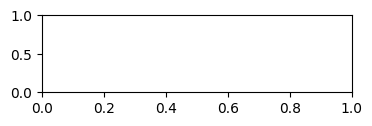

In [ ]:
sum_of_inv_sd = sum(inverse_std)
print("Sum of Inverse of Standard Deviation of each column:")
print(sum_of_inv_sd)

In [ ]:
ivv = inverse_std.iloc[0]

In [ ]:
ivv

np.float64(22.287887014075036)

In [ ]:
!pip install riskparityportfolio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for riskparityportfolio: filename=riskparityportfolio-0.6.0-cp311-cp311-linux_x86_64.whl size=1781367 sha256=5235671775aced2911bd86bf15ec820324fbfe6c209a9b99a62fdb7849533318
  Stored in directory: /root/.cache/pip/wheels/65/6c/dc/870566d2a29f1a114b0d36fc287fc66690805a529b508de52e
Successfully built riskparityportfolio


In [ ]:
import numpy as np
import pandas as pd
import riskparityportfolio as rp

# Example: df = returns data (monthly or daily returns)
cov = data.cov()
weights = rp(cov_matrix=cov)
print(weights)


TypeError: 'module' object is not callable

In [ ]:
cov

,IVV,VONG,SPTM,IXUS,CGW,VIGI,VXUS,VGK,VOE,VBR,...,VCLT,VTEB,AGG,VTIP,VCSH,MINT,JPLD,GLD,BITB,RF
IVV,0.002013,0.002168,0.002034,0.001610,0.001840,0.001476,0.001638,0.001827,0.002099,0.002320,...,0.000931,0.000293,0.000269,0.000155,0.000217,0.000085,-0.000047,0.000182,0.003269,0.0
VONG,0.002168,0.002580,0.002178,0.001621,0.001889,0.001542,0.001651,0.001801,0.001978,0.002218,...,0.001038,0.000338,0.000320,0.000178,0.000235,0.000089,-0.000038,0.000206,0.003741,0.0
SPTM,0.002034,0.002178,0.002065,0.001638,0.001871,0.001498,0.001667,0.001854,0.002161,0.002414,...,0.000935,0.000293,0.000267,0.000157,0.000221,0.000089,-0.000048,0.000160,0.003277,0.0
IXUS,0.001610,0.001621,0.001638,0.001834,0.001781,0.001606,0.001850,0.002060,0.001890,0.002033,...,0.000992,0.000341,0.000310,0.000169,0.000248,0.000088,-0.000023,0.000469,0.002585,0.0
CGW,0.001840,0.001889,0.001871,0.001781,0.002353,0.001692,0.001795,0.002048,0.002118,0.002297,...,0.001175,0.000409,0.000400,0.000188,0.000275,0.000082,-0.000043,0.000548,0.003341,0.0
VIGI,0.001476,0.001542,0.001498,0.001606,0.001692,0.001574,0.001626,0.001824,0.001643,0.001760,...,0.001004,0.000355,0.000347,0.000170,0.000244,0.000072,-0.000018,0.000492,0.002735,0.0
VXUS,0.001638,0.001651,0.001667,0.001850,0.001795,0.001626,0.001875,0.002080,0.001921,0.002070,...,0.001010,0.000348,0.000315,0.000172,0.000253,0.000091,-0.000025,0.000483,0.002604,0.0
VGK,0.001827,0.001801,0.001854,0.002060,0.002048,0.001824,0.002080,0.002507,0.002130,0.002270,...,0.001090,0.000377,0.000340,0.000173,0.000269,0.000091,-0.000027,0.000476,0.002998,0.0
VOE,0.002099,0.001978,0.002161,0.001890,0.002118,0.001643,0.001921,0.002130,0.002671,0.002957,...,0.000972,0.000293,0.000246,0.000156,0.000244,0.000111,-0.000059,0.000175,0.003398,0.0
VBR,0.002320,0.002218,0.002414,0.002033,0.002297,0.001760,0.002070,0.002270,0.002957,0.003495,...,0.000999,0.000307,0.000241,0.000162,0.000258,0.000123,-0.000065,-0.000006,0.003766,0.0


In [ ]:
#from pypfopt.risk_parity import rp_optimization

# Use your returns data
#weights = rp_optimization(data)

#print(weights)


In [ ]:
data

,IVV,VONG,SPTM,IXUS,CGW,VIGI,VXUS,VGK,VOE,VBR,...,VCLT,VTEB,AGG,VTIP,VCSH,MINT,JPLD,GLD,BITB,RF
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-01,0.001920,-0.011377,-0.004813,0.022474,0.039637,0.013599,0.019594,0.025617,0.007871,0.019005,...,0.017676,0.005347,-0.001413,-0.003832,-7.497189e-07,0.000381,0.0001,0.049088,0.076903,0
2016-05-01,0.014919,0.017227,0.019481,-0.012464,0.007224,0.005579,-0.011806,-0.007014,0.012435,0.012036,...,-0.008798,-0.000997,-0.003713,-0.002612,-4.369373e-03,-0.000911,0.0001,-0.063383,0.177264,0
2016-06-01,-0.004228,-0.011674,-0.005162,-0.025144,0.013234,0.011347,-0.023127,-0.061464,-0.003905,-0.003612,...,0.041603,0.013806,0.015299,0.007590,8.500000e-03,-0.001604,-0.0010,0.087695,0.264780,0
2016-07-01,0.035387,0.047722,0.040660,0.039462,0.010671,0.027370,0.043189,0.032719,0.039872,0.044434,...,0.020001,-0.002949,0.001596,-0.002808,-8.866898e-04,-0.001012,0.0023,0.017847,-0.073791,0
2016-08-01,-0.000718,-0.006653,-0.002464,0.003884,-0.003646,-0.021485,0.002517,0.004835,0.007266,0.005260,...,-0.003759,-0.002942,-0.005982,-0.006045,-4.718399e-03,-0.000223,0.0004,-0.034563,-0.079183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-01,0.023645,0.015958,0.024359,0.030670,0.015135,0.028754,0.030269,0.059995,0.022154,0.032528,...,0.000645,-0.003500,0.001660,0.006000,2.396680e-03,0.000686,-0.0025,0.064356,0.006963,0
2025-02-01,-0.016102,-0.039869,-0.019436,0.015067,0.001028,0.008853,0.015049,0.036500,-0.003500,-0.040174,...,0.026065,0.007073,0.015494,0.008161,1.724927e-03,-0.003798,0.0019,0.014716,-0.110918,0
2025-03-01,-0.062357,-0.089133,-0.062185,-0.001491,0.000647,-0.011276,-0.002694,-0.003358,-0.035925,-0.061642,...,-0.021609,-0.024029,-0.006825,0.005600,-2.739351e-03,-0.004592,0.0057,0.090966,-0.025216,0


In [ ]:
std_ivv = data['BITB'].std()

In [ ]:
std_ivv

0.2177726738884375

In [ ]:
sr = data['BITB'].mean()/std_ivv

In [ ]:
sr

np.float64(0.3246068157192366)

In [ ]:
sr = (data['BITB'].mean()*12)/(std_ivv*(12**0.5))


In [ ]:
#std_ivv*(12**0.5)

In [ ]:
#data['IVV'].mean()*12

In [ ]:
sr

np.float64(1.1244709946177311)